# Trade&Ahead

## Context
The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximize earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones that exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.

## Objective
Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

## Data Description
The data provided is of stock prices and some financial indicators like ROE, earnings per share, P/E ratio, etc.

**Data Dictionary**

* **Ticker Symbol** : An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
* **Company**: Name of the company
* **GICS Sector**: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
* **GICS Sub Industry**: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
* **Current Price**: Current stock price in dollars
* **Price Change**: Percentage change in the stock price in 13 weeks
* **Volatility**: Standard deviation of the stock price over the past 13 weeks
* **ROE**: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
* **Cash Ratio**: The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities
* **Net Cash Flow**: The difference between a company's cash inflows and outflows (in dollars)
* **Net Income**: Revenues minus expenses, interest, and taxes (in dollars)
* **Earnings Per Share**: Company's net profit divided by the number of common shares it has outstanding (in dollars)
* **Estimated Shares Outstanding**: Company's stock currently held by all its shareholders
* **P/E Ratio**: Ratio of the company's current stock price to the earnings per share
* **P/B Ratio**: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to check silhouette score and visualize
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform PCA
from sklearn.decomposition import PCA

<IPython.core.display.Javascript object>

## Loading Data

In [2]:
# read the data
data = pd.read_csv("stock_data.csv")

# create a copy of the data
df = data.copy()

<IPython.core.display.Javascript object>

## Data Overview

In [3]:
# view a random sample of 10 entries
df.sample(n=10)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
178,KIM,Kimco Realty,Real Estate,REITs,26.459999,8.709938,1.224688,18,47,2212000,894115000,2.01,4.448333e+08,13.164179,-1.269332
42,BBT,BB&T Corporation,Financials,Banks,37.810001,5.940045,1.077678,8,99,1386000000,2084000000,2.59,8.046332e+08,14.598456,-0.852562
24,AMP,Ameriprise Financial,Financials,Asset Management & Custody Banks,106.419998,-2.420686,1.222260,22,67,-281000000,1562000000,8.60,1.816279e+08,12.374418,-13.398380
116,ETN,Eaton Corporation,Industrials,Industrial Conglomerates,52.040001,1.166411,1.521430,13,10,-513000000,1979000000,4.25,4.656471e+08,12.244706,-8.639591
68,CMA,Comerica Inc.,Financials,Regional Banks,41.830002,1.900129,1.557655,7,99,76000000,521000000,2.93,1.778157e+08,14.276451,-0.063096
79,CTL,CenturyLink Inc,Telecommunications Services,Integrated Telecommunications Services,25.160000,0.159232,1.522194,6,3,-2000000,878000000,1.58,5.556962e+08,15.924051,-13.383212
69,CME,CME Group Inc.,Financials,Financial Exchanges & Data,90.599998,-2.402245,1.323348,6,99,326500000,1247000000,3.71,3.361186e+08,24.420485,-58.649536
168,IP,International Paper,Materials,Paper Packaging,37.700001,-0.026513,1.301630,24,27,-831000000,938000000,2.25,4.168889e+08,16.755556,6.123934
72,CMS,CMS Energy,Utilities,MultiUtilities,36.080002,1.949712,1.037844,14,12,39000000,537000000,1.90,2.826316e+08,18.989475,0.063687
262,R,Ryder System,Industrials,Industrial Conglomerates,56.830002,-23.244191,1.945966,15,4,10853000,304768000,5.75,5.300313e+07,9.883479,-12.020894


<IPython.core.display.Javascript object>

In [4]:
# view the shape of the data
df.shape

(340, 15)

<IPython.core.display.Javascript object>

In [5]:
# check data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

## Data Preprocessing
- Check for duplicate entries
- Double check for missing values
- Fix Column Name

In [6]:
# check for duplicate values in the dataset
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [7]:
# double check for missing values in the dataset
round(df.isnull().sum() / df.isnull().count() * 100, 2)

Ticker Symbol                   0.0
Security                        0.0
GICS Sector                     0.0
GICS Sub Industry               0.0
Current Price                   0.0
Price Change                    0.0
Volatility                      0.0
ROE                             0.0
Cash Ratio                      0.0
Net Cash Flow                   0.0
Net Income                      0.0
Earnings Per Share              0.0
Estimated Shares Outstanding    0.0
P/E Ratio                       0.0
P/B Ratio                       0.0
dtype: float64

<IPython.core.display.Javascript object>

**Observations**
* There are 15 variables and 340 observations
* There are no null values
* 4 object variables, 4 int variables, and 7 float variables
* The numerical values vary wildly, especially from variable to variable
* *Company* column is labeled as *Security*

In [8]:
# view descriptive statistics of all the columns of the dataset
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


<IPython.core.display.Javascript object>

**Observations**
* There are 340 unique ticker symbols and companies
* There are 11 GICS secotrs, the most common of which is Industrials
* There are 104 GICS Sectors, the most common of which is Oil & Gas Exploration & Production
* Current price ranges from 4.5 to ~1274.95. Mean is ~80.86 with a standard deviation of ~98.06. Positively skewed
* Price change ranges from ~-47.13 to ~55.05. Mean is ~4.08 with a standard deviation of ~12.0. Somewhat skewed left
* Volatility ranges from ~0.73 to ~4.58. Mean is ~1.53 with a standard deviation of ~0.59. Somewhat positively skewed
* ROE is positively skewed
* Cash ratio is positively skewed
* Net cash flow is positively skewed
* Net income is positively skewed
* Earnings per share is positively skewed
* Estimated shares outstanding is positively skewed
* P/E Ratio is positively skewed
* P/B Ratio is postiively skewed

In [9]:
# rename Security to Company
df.rename(columns={"Security": "Company"}, inplace=True)

<IPython.core.display.Javascript object>

## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [10]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [11]:
# define horizontal labeled barplot
def horiz_labeled_barplot(data, feature, n=None):
    """
    Horizontal barplot with count and percentage in the bar/on the side
    data: dataframe
    feature: dataframe column
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count * 0.6, (count * 0.4)))
    else:
        plt.figure(figsize=(n * 0.6, (n * 0.4)))

    ax = sns.countplot(
        data=data,
        y=feature,
        palette="hls",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        label = "{:1.0f} |  {:.2f}%".format(width, 100 * width / total)
        x = width
        y = p.get_y() + height / 2

        ax.annotate(
            label, (x, y), ha="left", va="center", size=9,
        )

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
        dpi=100,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

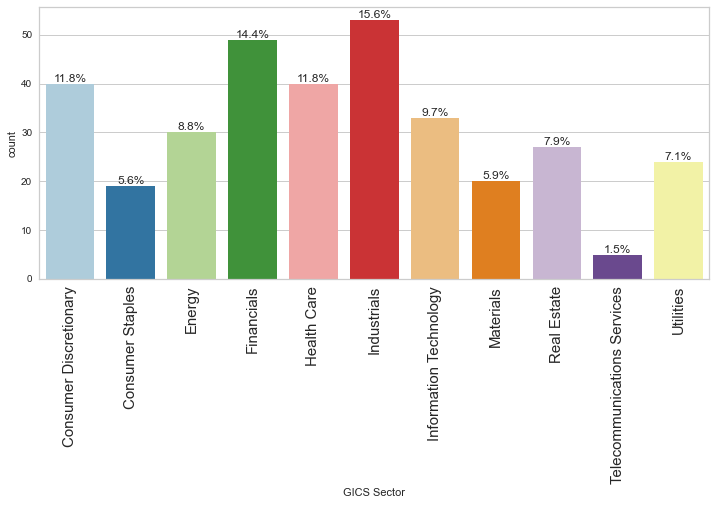

<IPython.core.display.Javascript object>

In [13]:
# plot labeled barplot of GICS Sector
labeled_barplot(df, "GICS Sector", perc=True)

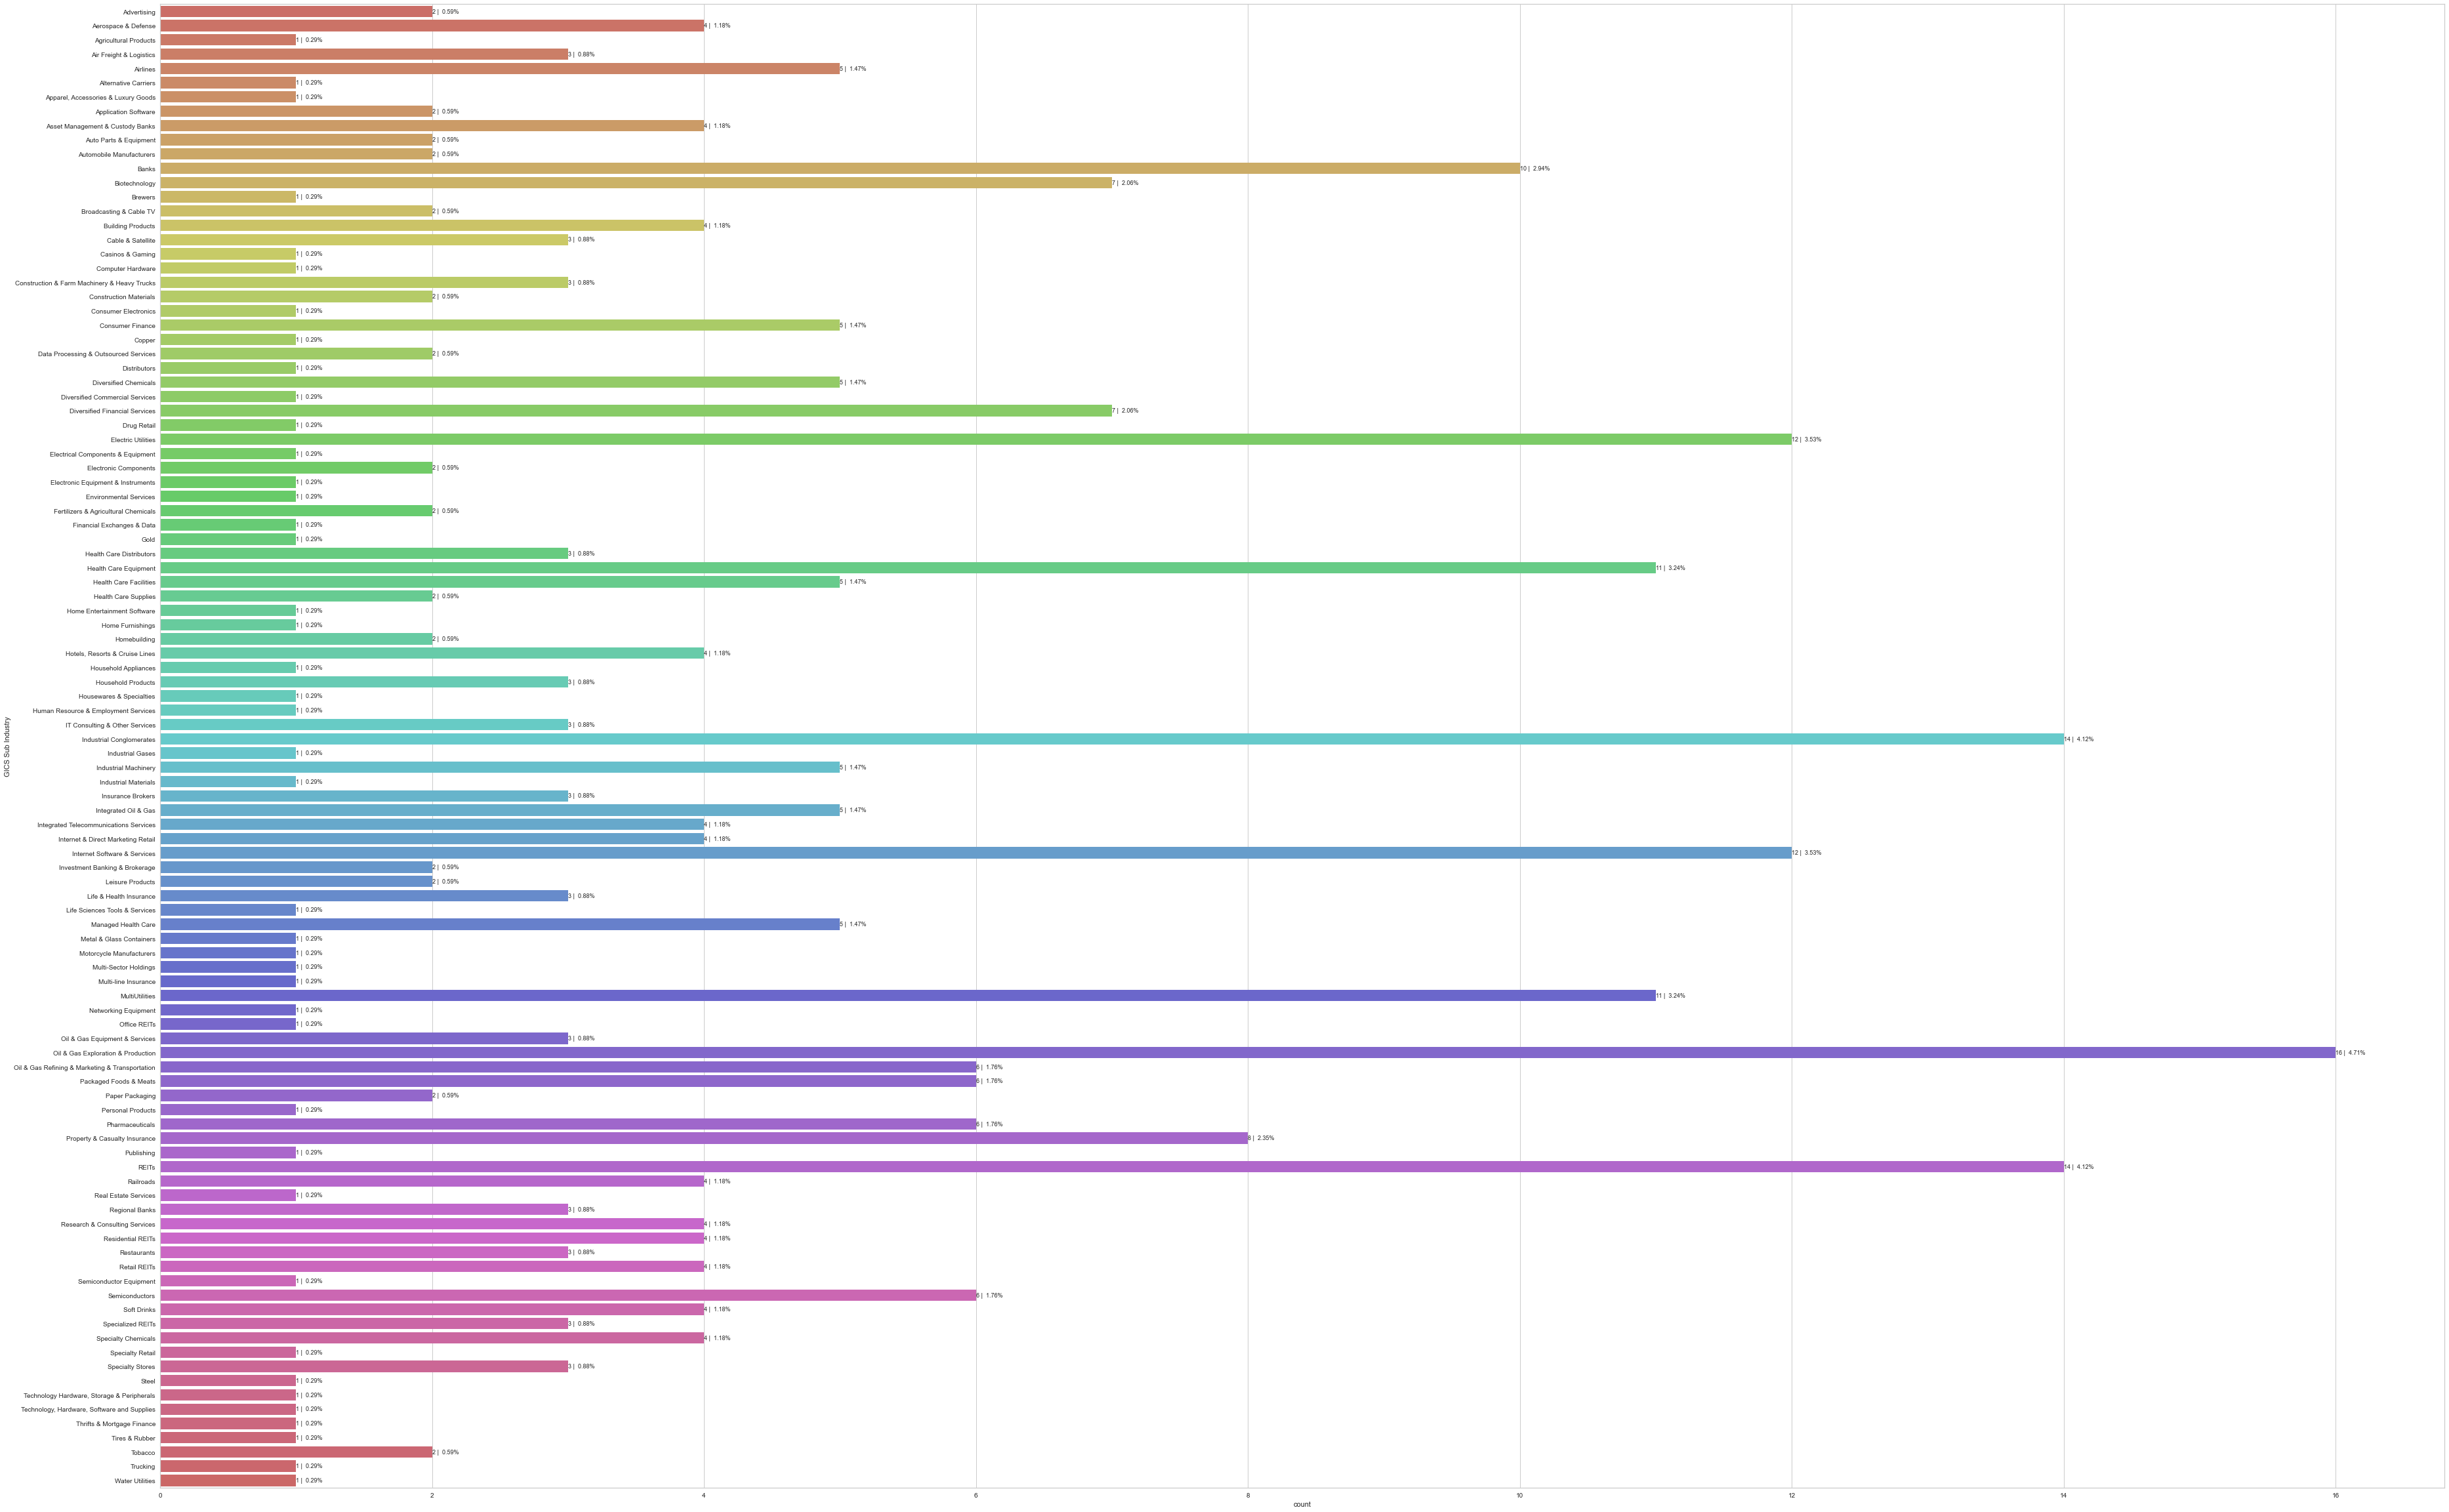

<IPython.core.display.Javascript object>

In [14]:
# plot labeled barplot of GICS Sub Indistury
horiz_labeled_barplot(df, "GICS Sub Industry")

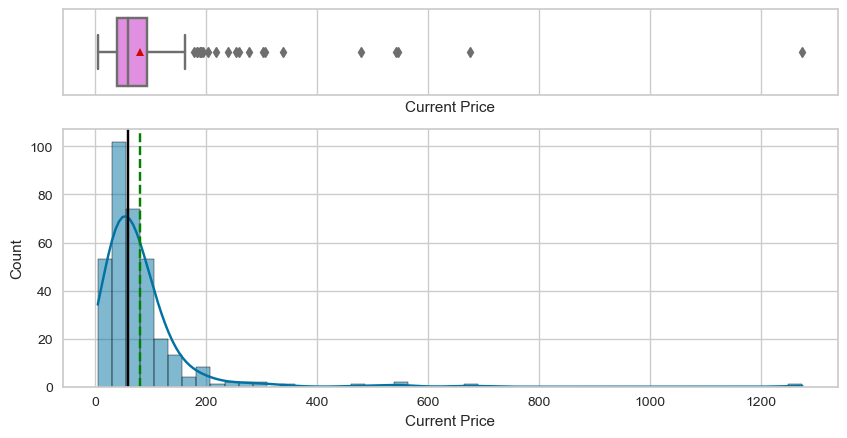

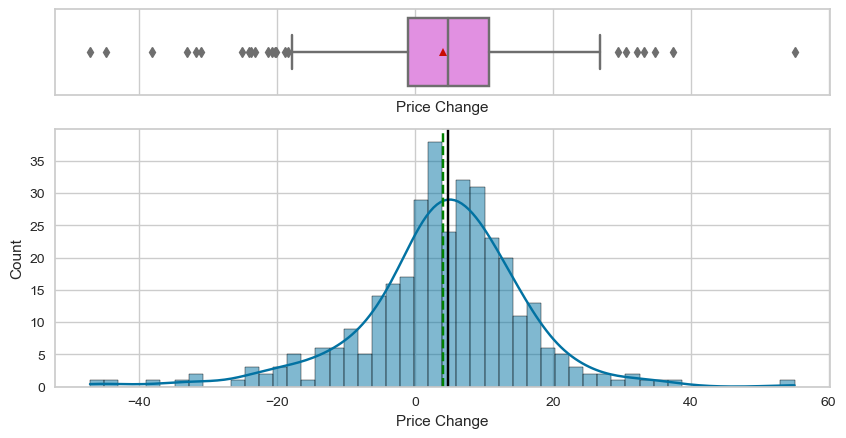

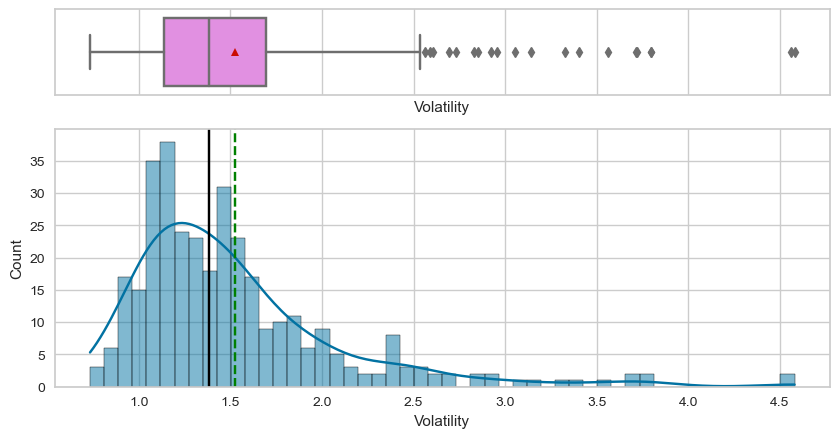

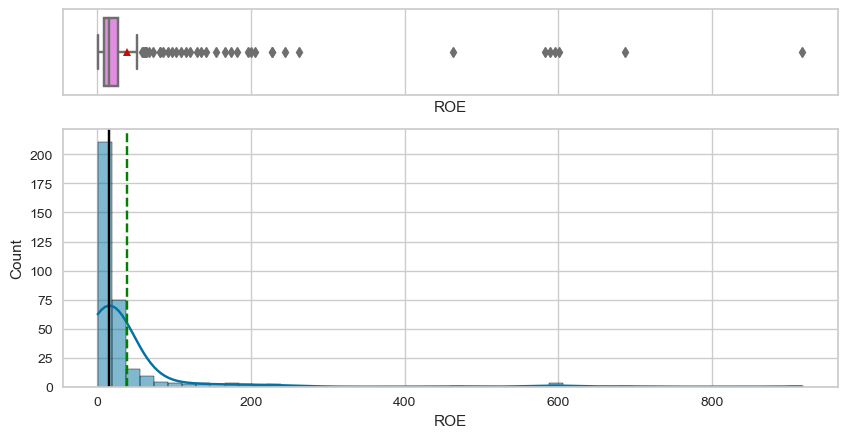

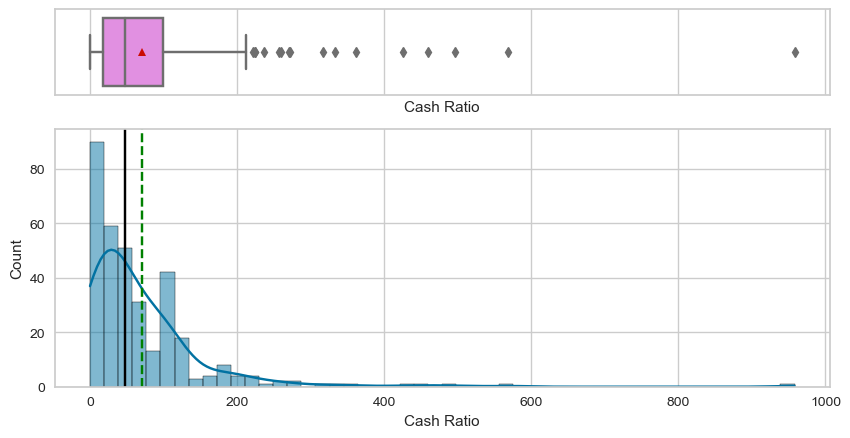

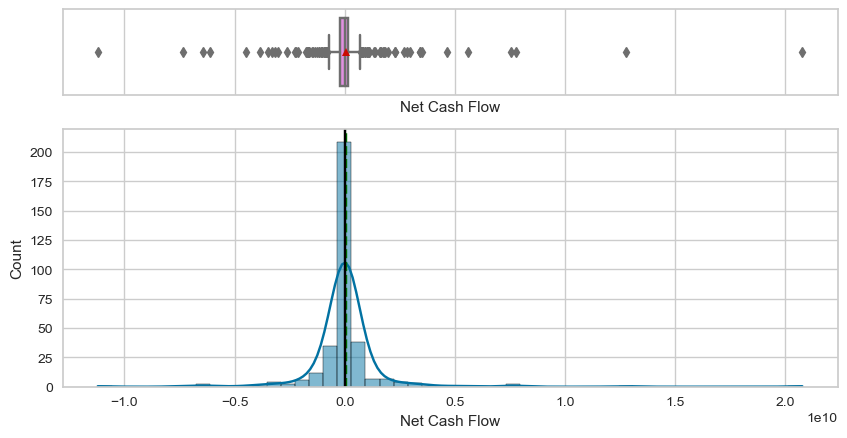

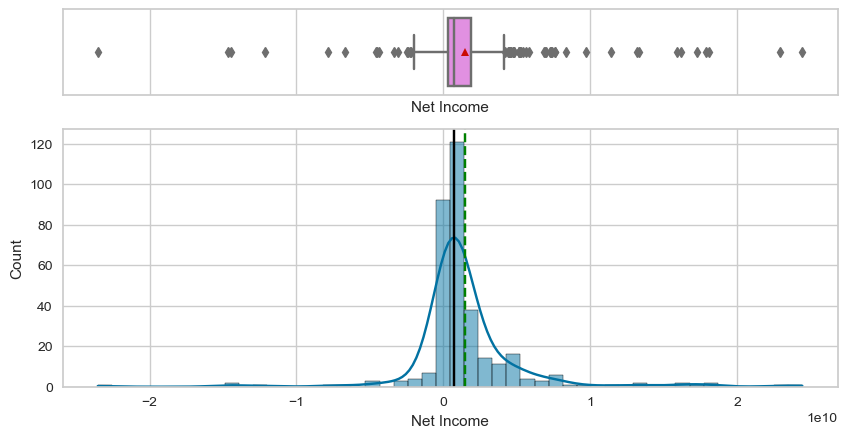

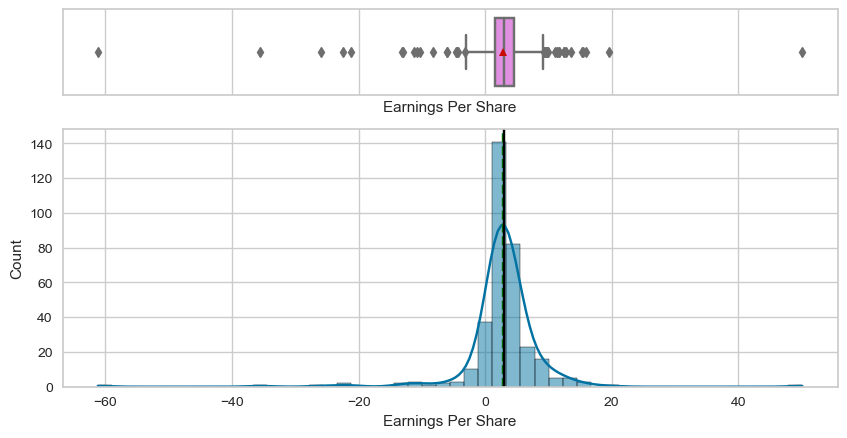

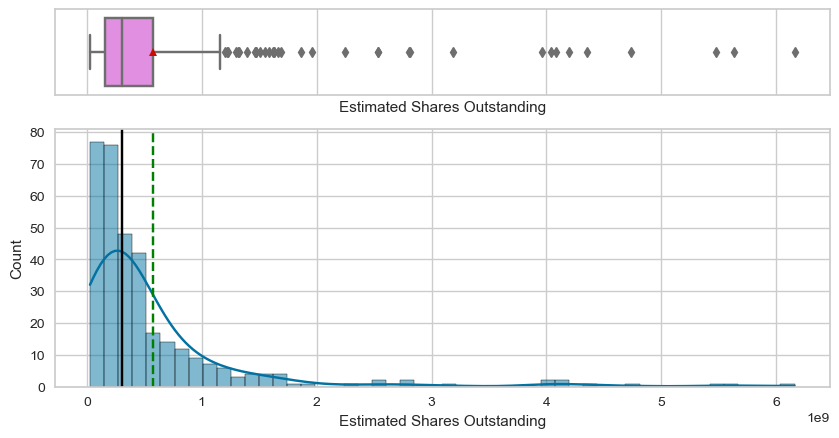

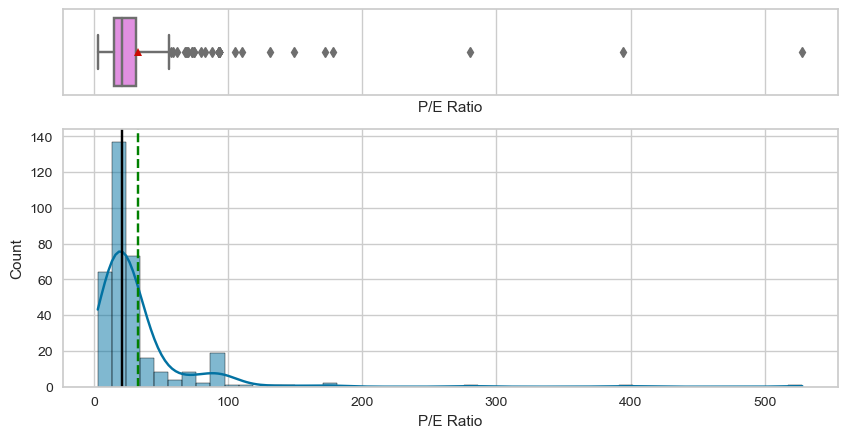

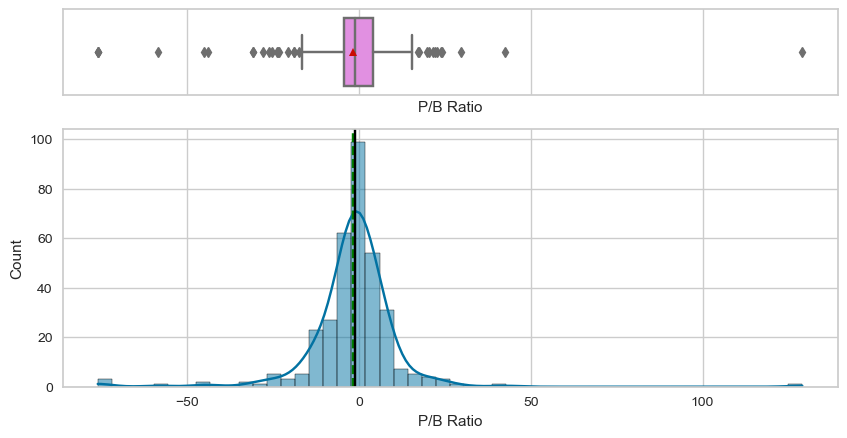

<IPython.core.display.Javascript object>

In [15]:
# selecting numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

for item in num_cols:
    histogram_boxplot(df, item, bins=50, kde=True, figsize=(10, 5))

**Observations**
* Industrials, Financials, and Consumer Discretionary are the 3 most popular GICS Sectors among the stocks in our data
* Oil & Gas Exploration & Production, Industrial Conglomerates, and REITs are the 3 most popular GICS Sub Industries among the stocks in our data
* Most of the numerical variables have some extreme outliers, although they may be due to reliable data.
* Some variables have outliers in both directions, like `Price Change`, `Net Cash Flow`, `Net Income`, `Earnings Per Share`, and `P/B Ratio`
* The remainder of numerical variables have outliers in positive direction, skewing the data

### Bivariate Analysis
**Check for correlations**

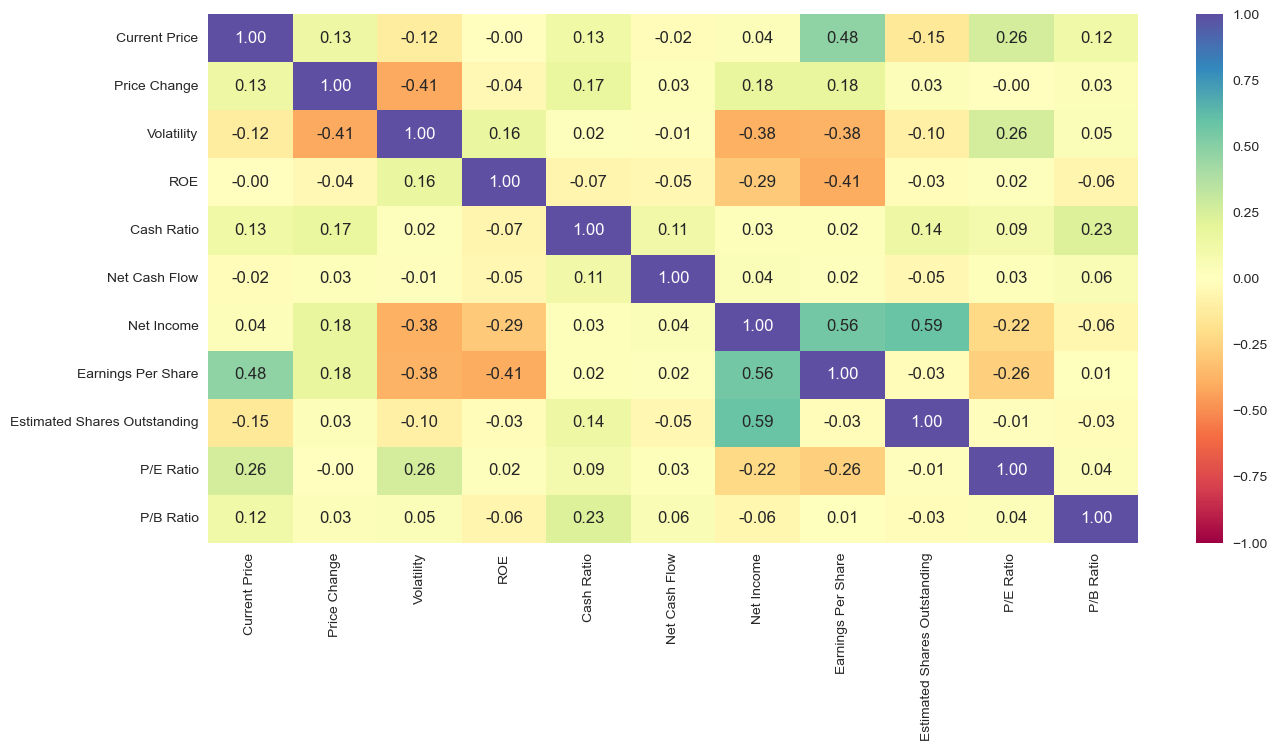

<IPython.core.display.Javascript object>

In [16]:
plt.figure(figsize=(15, 7), dpi=100)
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations**
* There are no strongly correlated variables.
* `Net Income` has a moderate positive correlation with `Earnings Per Share` and `Estimated Shares Outstanding`
* `Earnings Per Share` has a moderate positive correlation with `Current Price`
* `Volatility` and `Price Change` have a weak to moderate negative correlation
* `ROE` and `Earnings Per Share` have a weak to moderate negative correlation

**Pairplot**

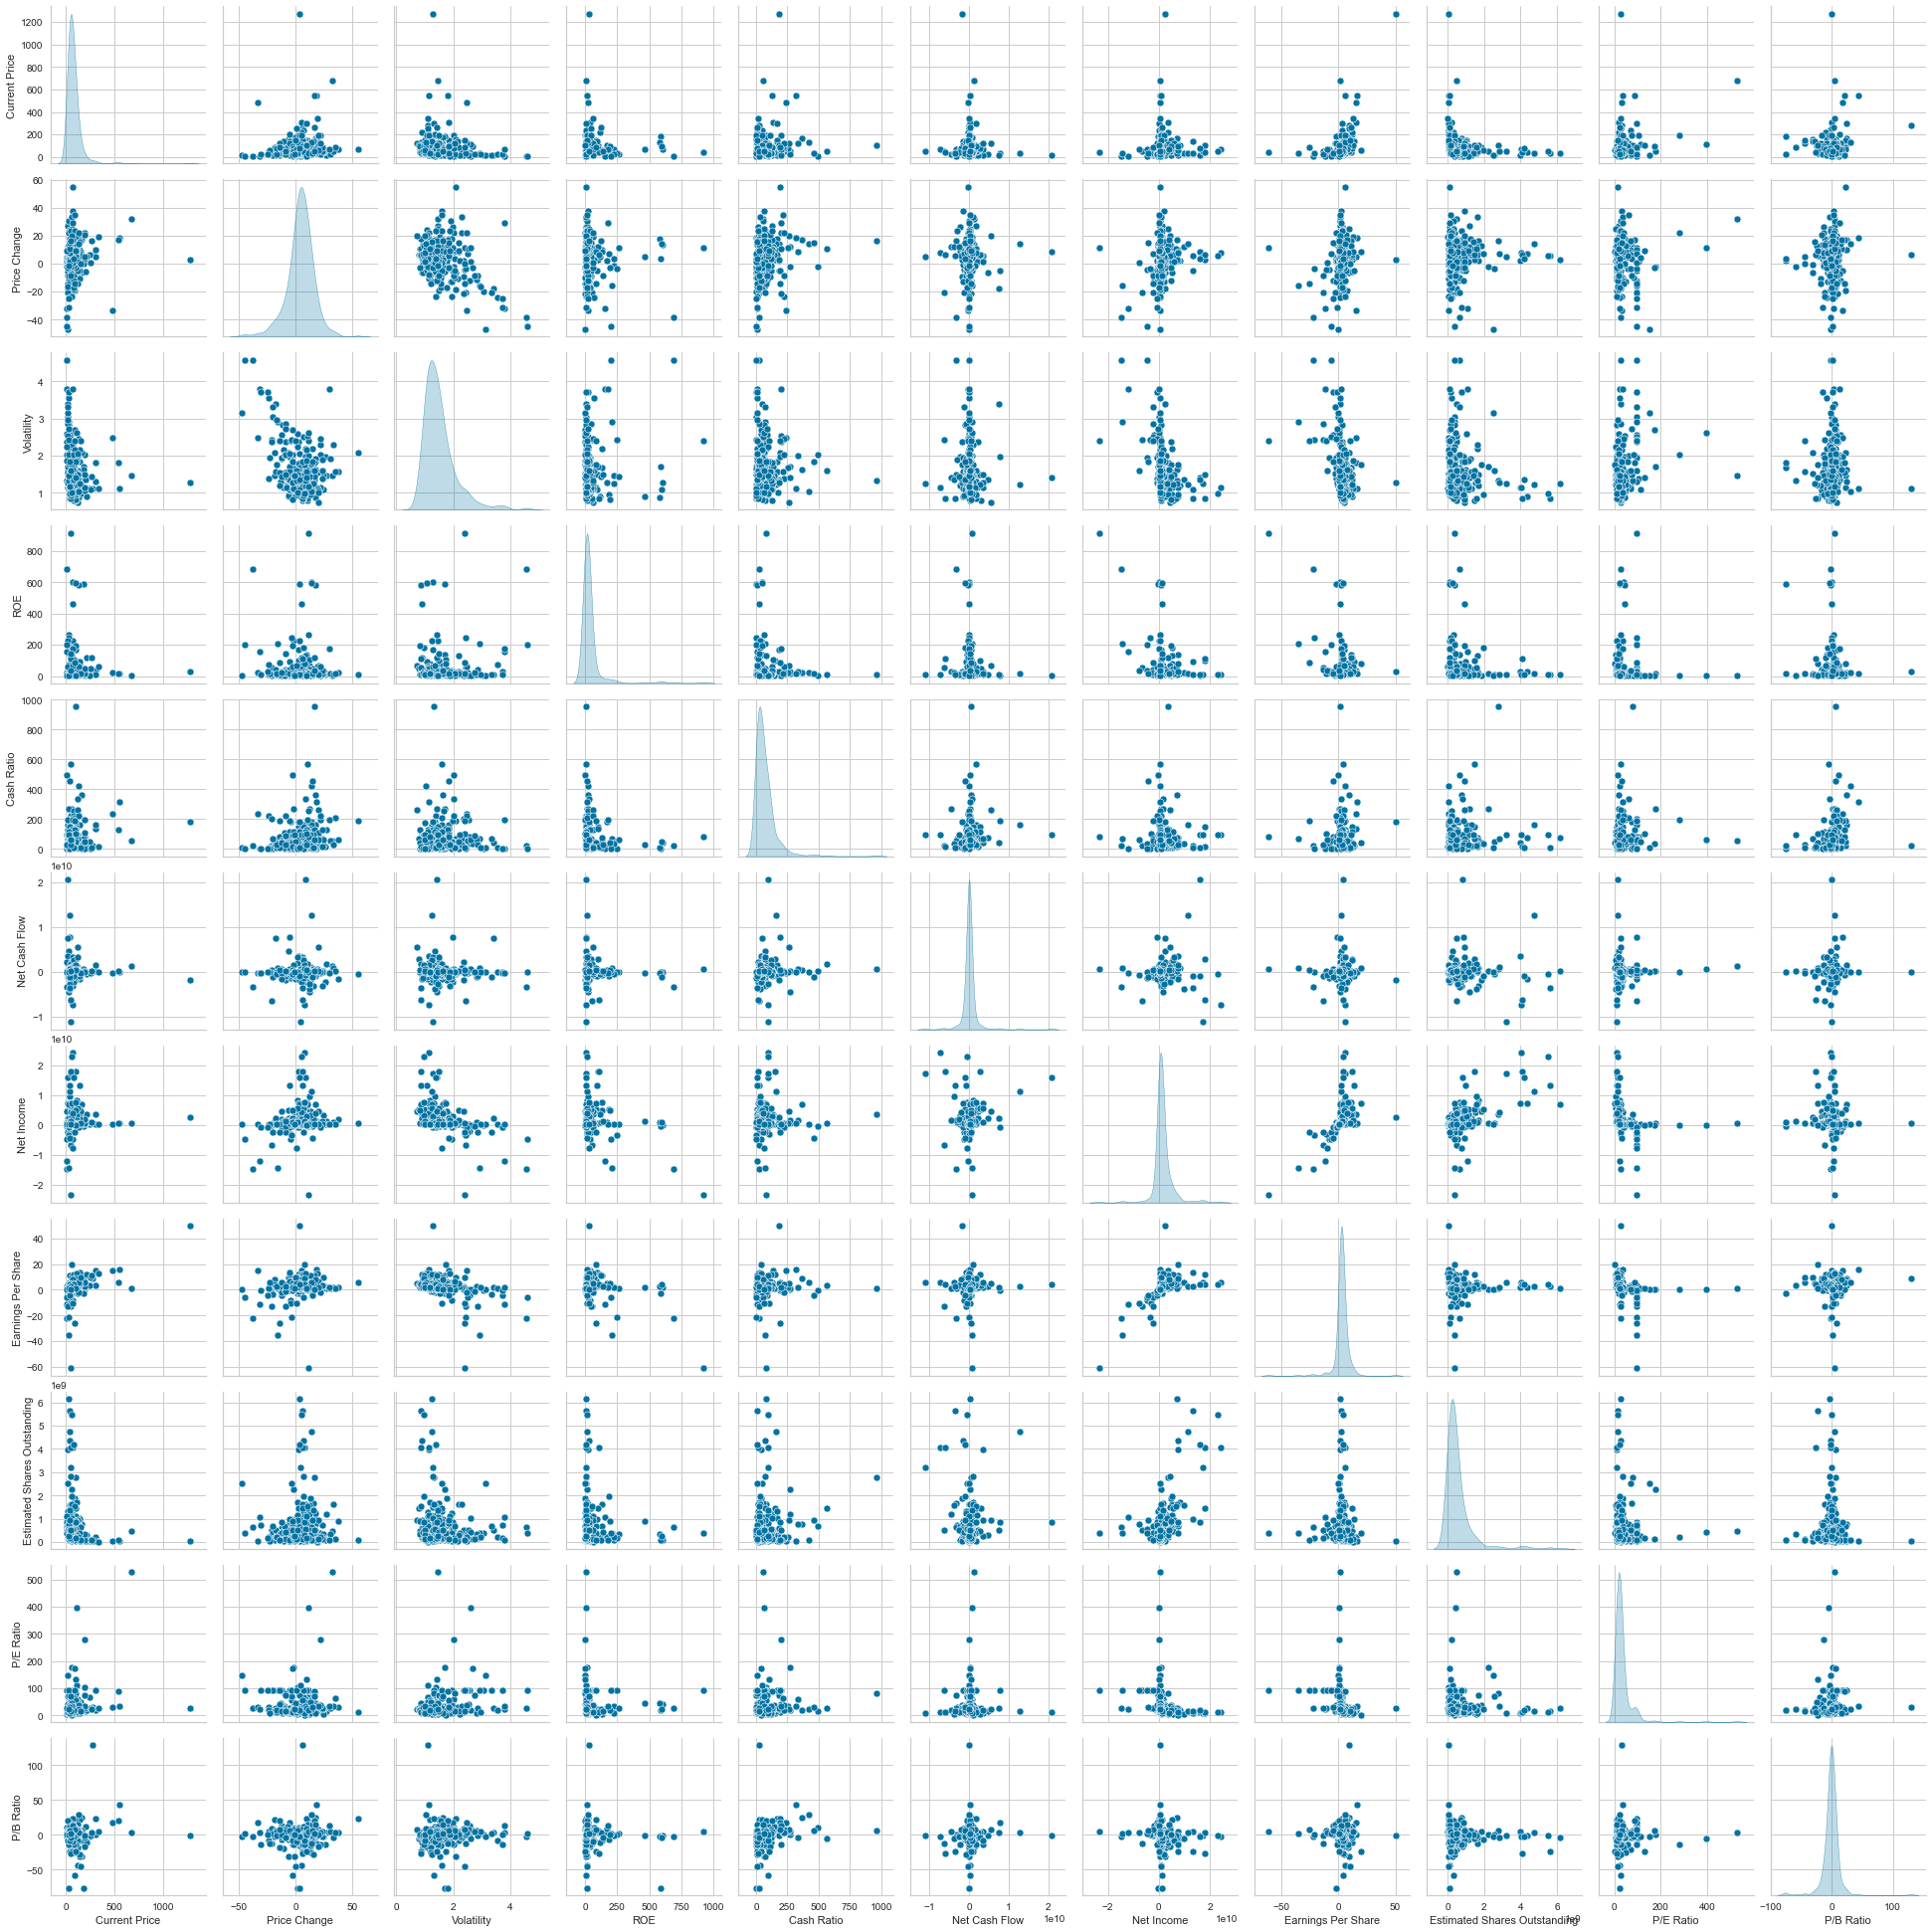

<IPython.core.display.Javascript object>

In [17]:
sns.pairplot(df[num_cols], diag_kind="kde")

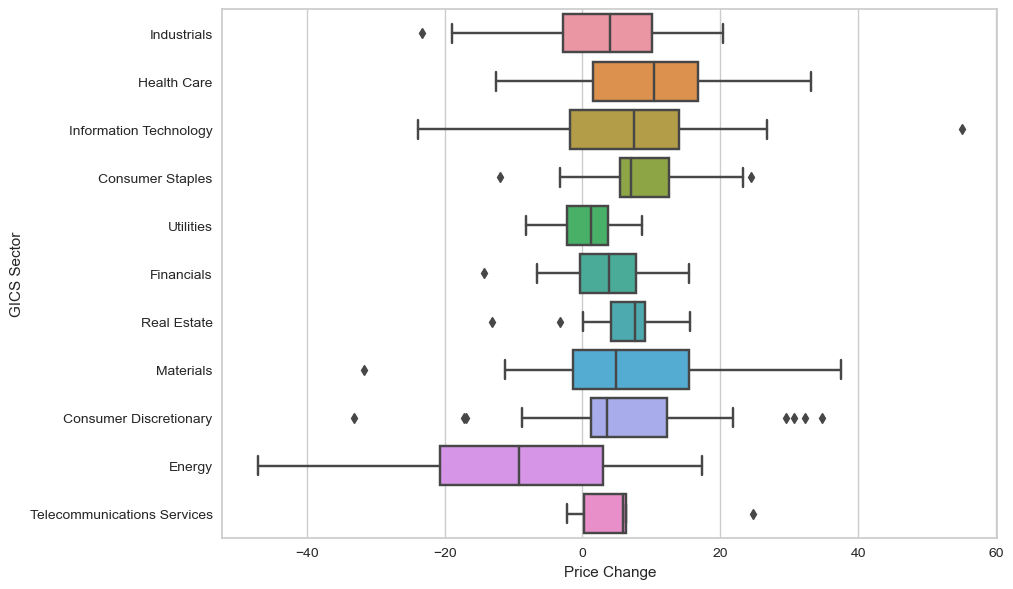

<IPython.core.display.Javascript object>

In [18]:
plt.figure(figsize=(10, 7), dpi=100)
sns.boxplot(data=df, x="Price Change", y="GICS Sector")
plt.show()

* Energy is the only sector that has mostly negative price change and has the minimum price change
* Information technology has the maximum price change

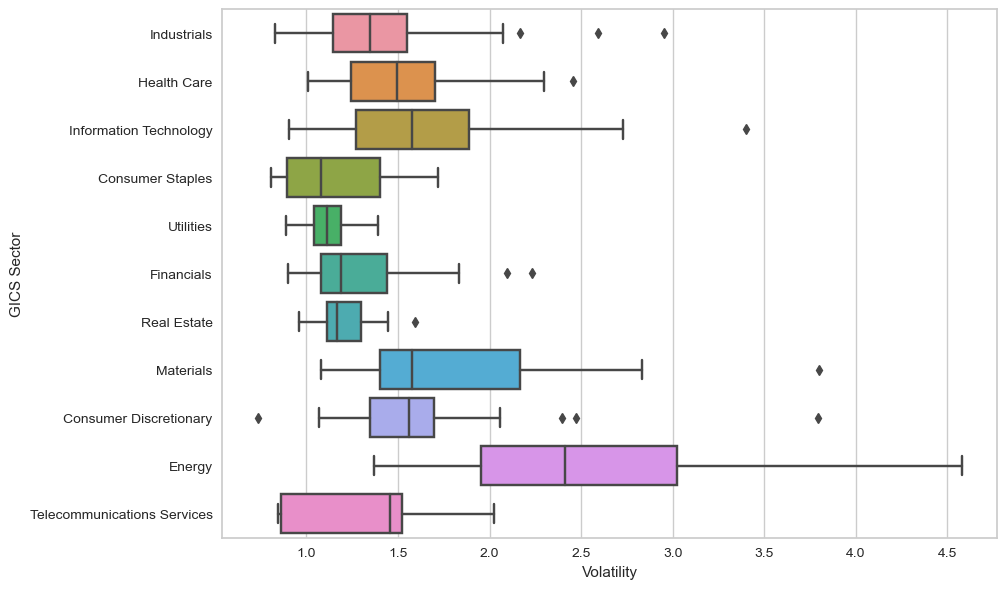

<IPython.core.display.Javascript object>

In [19]:
plt.figure(figsize=(10, 7), dpi=100)
sns.boxplot(data=df, x="Volatility", y="GICS Sector")
plt.show()

* Energy has the highest volatility, while utilities appears to have the lowest overall volatility

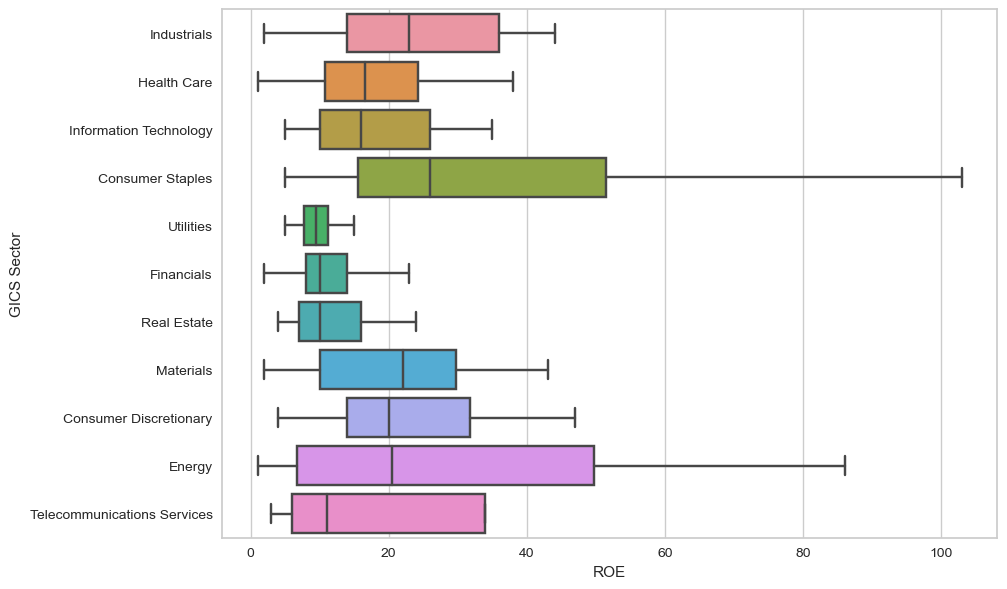

<IPython.core.display.Javascript object>

In [20]:
plt.figure(figsize=(10, 7), dpi=100)
sns.boxplot(data=df, x="ROE", y="GICS Sector", showfliers=False)
plt.show()

* Consumer Staples appears to have the highest overall ROE 
* Utilities has the lowest overall ROE
* Telecommunications Services has the lowest median ROE

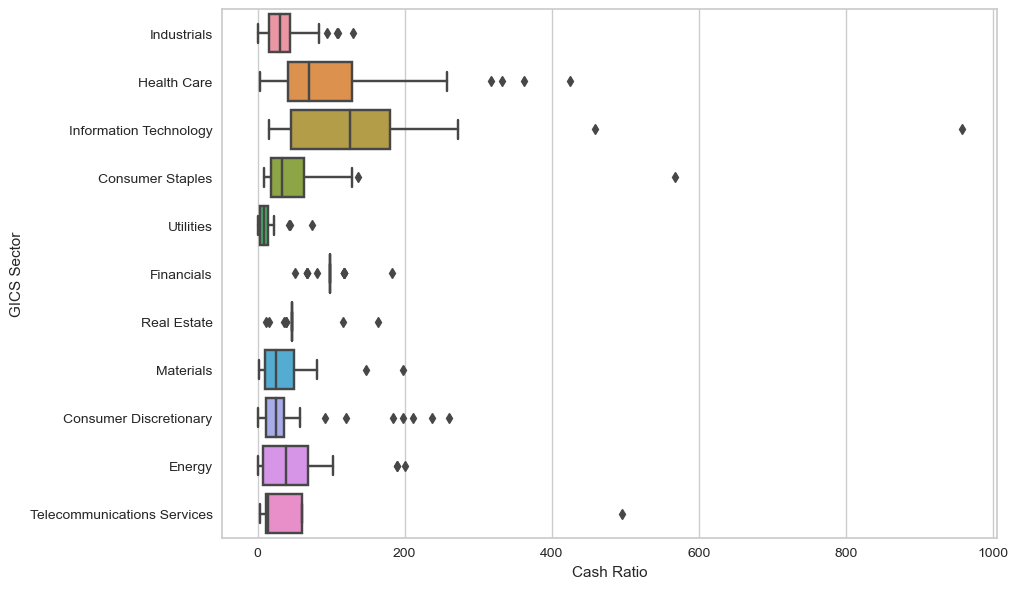

<IPython.core.display.Javascript object>

In [21]:
plt.figure(figsize=(10, 7), dpi=100)
sns.boxplot(data=df, x="Cash Ratio", y="GICS Sector")  # , showfliers=False)
plt.show()

* Information Techology has the maximum cash ratio as well as the highest median cash ratio
* Utilities has overall lowest cash ratio

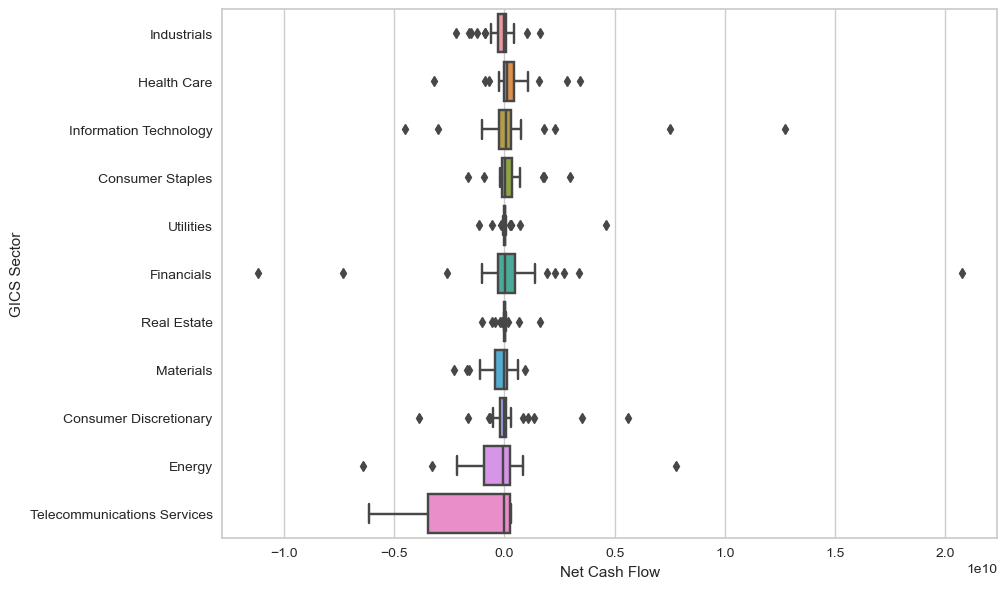

<IPython.core.display.Javascript object>

In [22]:
plt.figure(figsize=(10, 7), dpi=100)
sns.boxplot(data=df, x="Net Cash Flow", y="GICS Sector")  # , showfliers=False)
plt.show()

* Financials has the most extreme values for net cash flow in both negative and positive directions
* Telecommunications Services has the biggest spread for net cash flow, aside from outliers

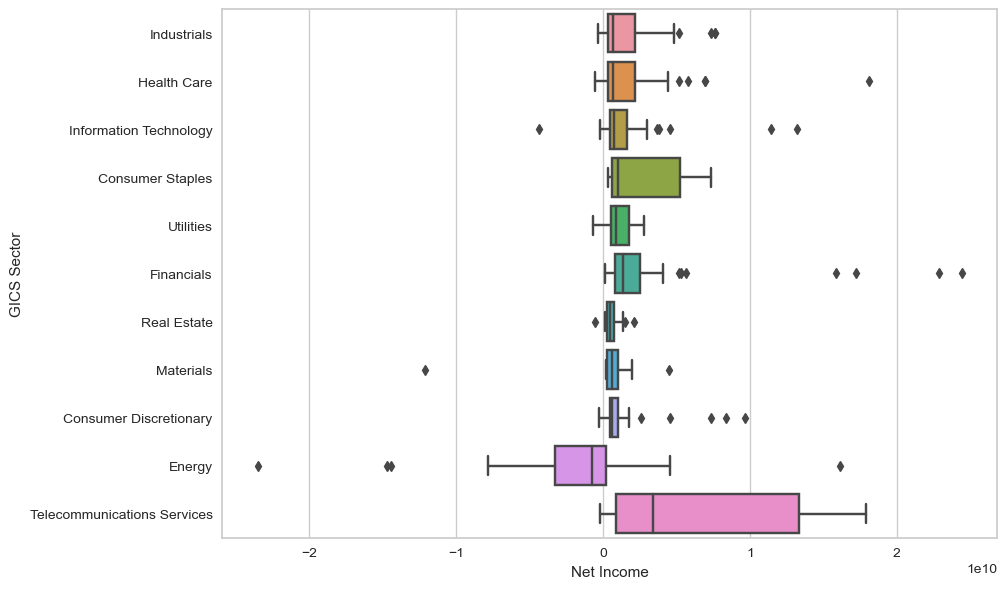

<IPython.core.display.Javascript object>

In [23]:
plt.figure(figsize=(10, 7), dpi=100)
sns.boxplot(data=df, x="Net Income", y="GICS Sector")  # , showfliers=False)
plt.show()

* Energy has the minimum net income, the lowest overall net income, and mostly negative values
* Financials has the maximum net income but the majority of the sector is under 0.5 net income
* Telecommunications has the largest spread aside from outliers, and is mostly positive for net income

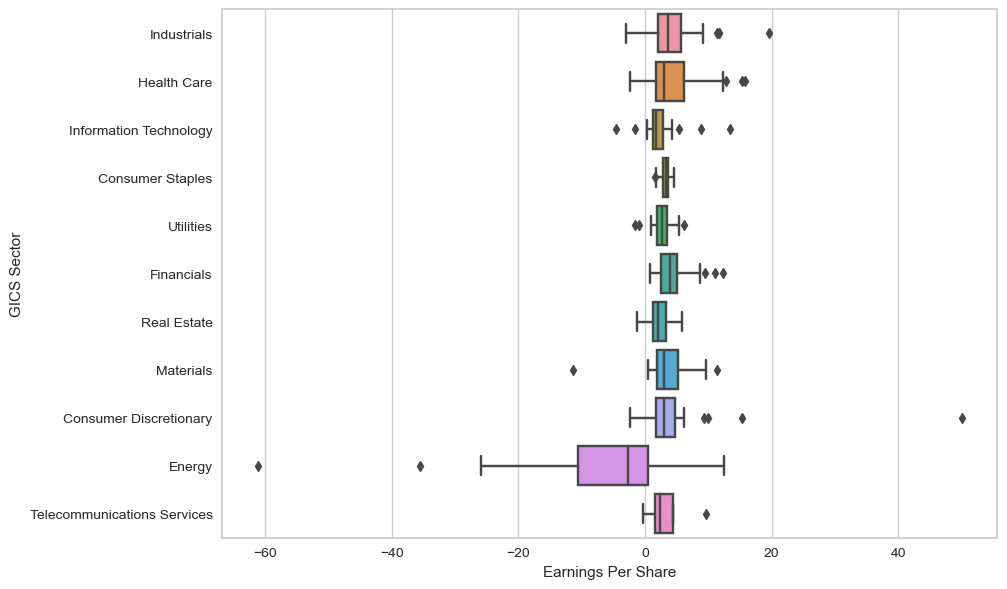

<IPython.core.display.Javascript object>

In [24]:
plt.figure(figsize=(10, 7), dpi=100)
sns.boxplot(data=df, x="Earnings Per Share", y="GICS Sector")  # , showfliers=False)
plt.show()

* Energy has the minimum earnings per share, and has mostly negative values
* Consumer Discretionary has the maximum earnings per share

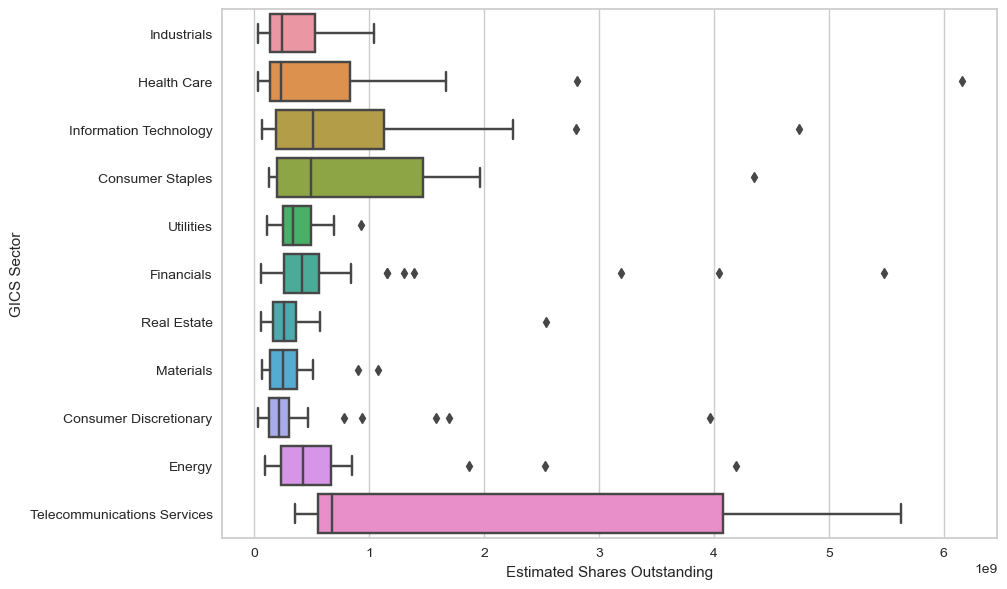

<IPython.core.display.Javascript object>

In [25]:
plt.figure(figsize=(10, 7), dpi=100)
sns.boxplot(
    data=df, x="Estimated Shares Outstanding", y="GICS Sector"
)  # , showfliers=False)
plt.show()

* Telecommunications has the highest median estimated shares outstanding and the largest spread, aside from outliers
* Health care has the maximum estimated shares outstanding

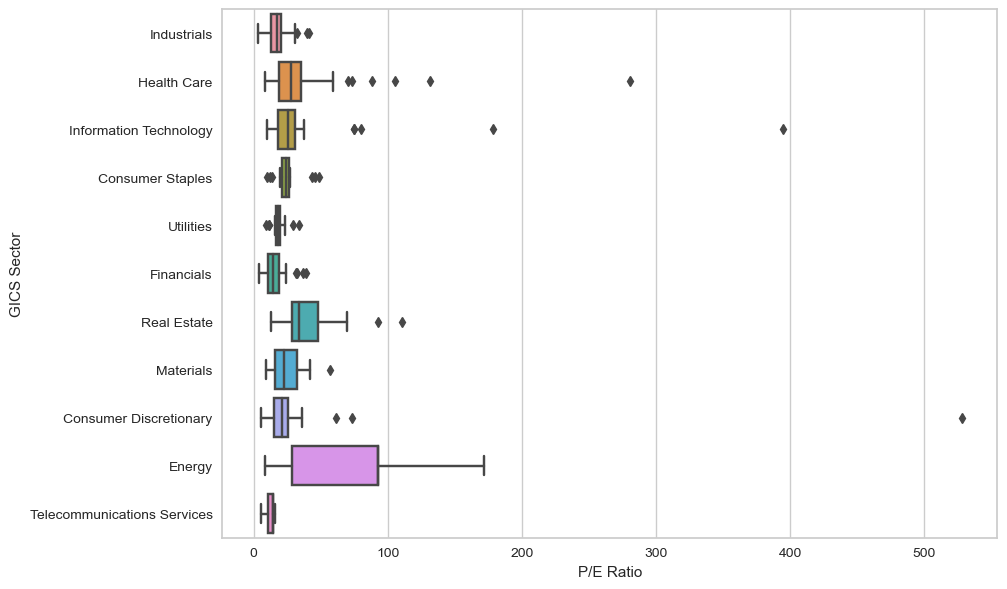

<IPython.core.display.Javascript object>

In [26]:
plt.figure(figsize=(10, 7), dpi=100)
sns.boxplot(data=df, x="P/E Ratio", y="GICS Sector")  # , showfliers=False)
plt.show()

* Consumer Discretionary has maximum P/E ratio but most values are not very high
* Telecommunications Services has very low overall P/E Ratio
* Energy has the largest spread of P/E Ratio aside from outliers

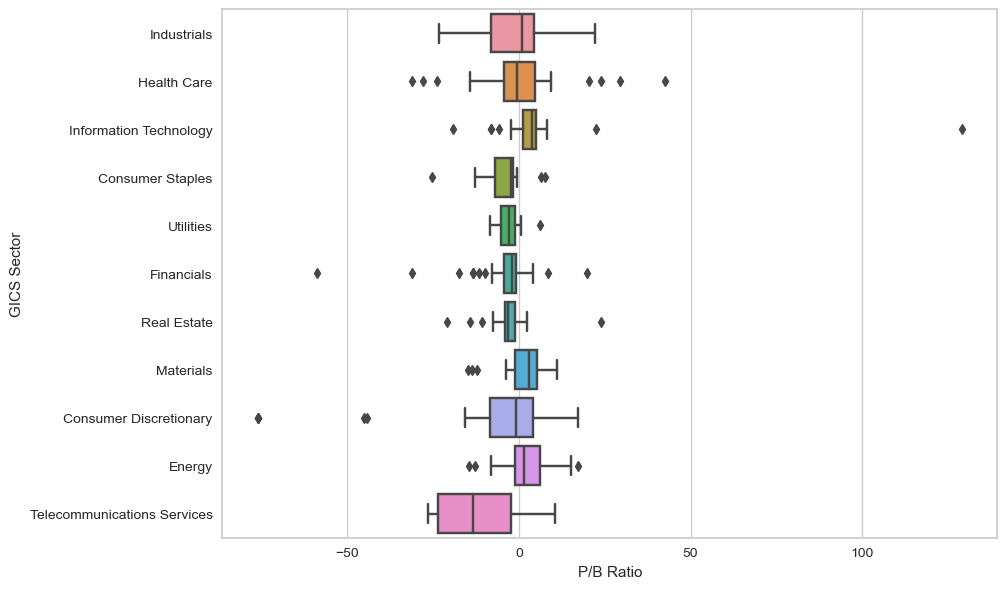

<IPython.core.display.Javascript object>

In [27]:
plt.figure(figsize=(10, 7), dpi=100)
sns.boxplot(data=df, x="P/B Ratio", y="GICS Sector")  # , showfliers=False)
plt.show()

* Information Technology has the largest median P/B ratio and the maximum P/B Ratio, but most of its values are much smaller, though most are positive
* Consumer Staples, Utilities, Financials, Real Estate, and Telecommunications have a majority of negative P/B ratio values

## Data Preprocessing continued

In [28]:
# see company names by GICS Sector
for cl in df["GICS Sector"].unique():
    print(
        "The",
        df[df["GICS Sector"] == cl]["Company"].nunique(),
        "companies in cluster",
        cl,
        "are:",
    )
    print(df[df["GICS Sector"] == cl]["Company"].unique())
    print("-" * 100, "\n")

The 53 companies in cluster Industrials are:
['American Airlines Group' 'Alaska Air Group Inc' 'Allegion' 'AMETEK Inc'
 'Arconic Inc' 'Boeing Company' 'Caterpillar Inc.'
 'C. H. Robinson Worldwide' 'Cummins Inc.' 'CSX Corp.' 'Delta Air Lines'
 'Deere & Co.' 'Danaher Corp.' 'Dun & Bradstreet' 'Dover Corp.'
 'Equifax Inc.' 'Eaton Corporation' "Expeditors Int'l" 'Fastenal Co'
 'Fortune Brands Home & Security' 'Fluor Corp.' 'Flowserve Corporation'
 'General Dynamics' 'Grainger (W.W.) Inc.' "Honeywell Int'l Inc."
 'Illinois Tool Works' 'J. B. Hunt Transport Services'
 'Jacobs Engineering Group' 'Kansas City Southern' 'Leggett & Platt'
 'L-3 Communications Holdings' 'Lockheed Martin Corp.'
 'Southwest Airlines' 'Masco Corp.' '3M Company' 'Nielsen Holdings'
 'Norfolk Southern Corp.' 'Pitney-Bowes' 'PACCAR Inc.' 'Pentair Ltd.'
 'Quanta Services Inc.' 'Ryder System' 'Robert Half International'
 'Roper Industries' 'Republic Services Inc' 'Stericycle Inc'
 'United Continental Holdings' 'Union Pac

<IPython.core.display.Javascript object>

In [29]:
# print out rows with the min or max values for each numerical variable
# to see what the outliers might look like

for item in num_cols:
    print(item.lower() + " minimum")
    print([df.loc[df[item] == df[item].min()]])
    print("-" * 50)
    print(item + " Maximum")
    print([df.loc[df[item] == df[item].max()]])
    print("*" * 50)

current price minimum
[   Ticker Symbol            Company GICS Sector     GICS Sub Industry  \
62           CHK  Chesapeake Energy      Energy  Integrated Oil & Gas   

    Current Price  Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  \
62            4.5    -38.101788    4.559815  687          22    -3283000000   

     Net Income  Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  \
62 -14685000000              -22.43                   654703522.1  28.407929   

    P/B Ratio  
62  -1.840528  ]
--------------------------------------------------
Current Price Maximum
[    Ticker Symbol            Company             GICS Sector  \
243          PCLN  Priceline.com Inc  Consumer Discretionary   

                      GICS Sub Industry  Current Price  Price Change  \
243  Internet & Direct Marketing Retail    1274.949951      3.190527   

     Volatility  ROE  Cash Ratio  Net Cash Flow  Net Income  \
243     1.26834   29         184    -1671386000  2551360000   

  

218                   27672156.86  26.598432   4.403994  ]
--------------------------------------------------
Estimated Shares Outstanding Maximum
[    Ticker Symbol      Company  GICS Sector GICS Sub Industry  Current Price  \
246           PFE  Pfizer Inc.  Health Care   Pharmaceuticals      32.279999   

     Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  Net Income  \
246      3.130991    1.238748   11          79      298000000  6960000000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
246                1.13                  6.159292e+09  28.566371  -4.213309  ]
**************************************************
p/e ratio minimum
[    Ticker Symbol                      Company  GICS Sector GICS Sub Industry  \
301           UAL  United Continental Holdings  Industrials          Airlines   

     Current Price  Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  \
301      57.299999      8.215294    1.747606   82          42     

<IPython.core.display.Javascript object>

**Note:**

According to limited, rudimentary understanding of stocks, it seems there may be some anomalies with the data., e.g., is it possible P/E Ratio and P/B Ratio may be switched (labeling)? Some of the values seem as though they may not be accurate, but without all the data, it is hard to make the determination or create a solution. We will proceed as though all the data is accurate, as there are no duplicate or missing entries.

### Scale Data
We need to scale the numerical data prior to clustering

In [30]:
scaler = StandardScaler()
subset = df[num_cols].copy()
subset_scaled = scaler.fit_transform(subset)
subset_scaled

array([[-0.39334123,  0.49394985,  0.2727489 , ...,  0.10786299,
        -0.65248711, -0.50665346],
       [-0.2208372 ,  0.35543891,  1.13704483, ...,  1.25027416,
        -0.31176905, -0.50420469],
       [-0.36719495,  0.6024795 , -0.42700717, ...,  1.09802058,
        -0.39150173,  0.09494078],
       ...,
       [ 0.22191276,  0.43953914, -0.20606693, ..., -0.46005754,
         2.23363447, -1.58938994],
       [-0.54705258, -0.43681096, -0.09781298, ..., -0.37785227,
        -0.22271438,  0.11867997],
       [-0.3364527 ,  1.05104602,  0.14267127, ..., -0.09294161,
         0.85490199,  0.24675384]])

<IPython.core.display.Javascript object>

In [31]:
# Creating a dataframe from the scaled data above
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196
...,...,...,...,...,...,...,...,...,...,...,...
335,-0.486181,0.901646,0.540121,-0.255142,4.308162,-0.559673,-1.487784,-1.127481,0.429111,-0.082116,0.572194
336,-0.289510,-1.065766,-0.079703,1.062211,-0.476513,0.053235,-0.051186,0.029391,-0.167741,-0.337154,-0.152012
337,0.221913,0.439539,-0.206067,-0.400362,0.332009,0.164889,-0.342467,-0.303532,-0.460058,2.233634,-1.589390
338,-0.547053,-0.436811,-0.097813,-0.369243,0.320933,-0.051022,-0.301171,-0.239684,-0.377852,-0.222714,0.118680


<IPython.core.display.Javascript object>

## K-means Clustering

### Selecting $k$ with the Elbow Method

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

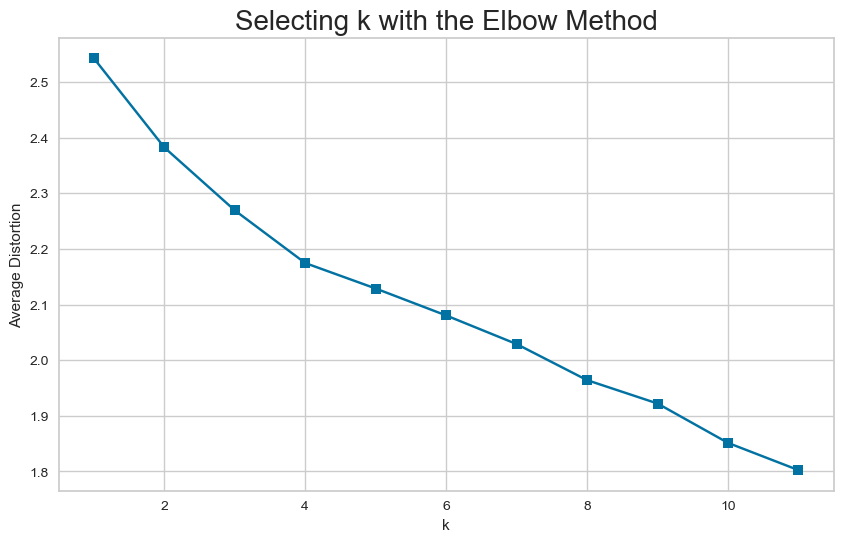

<IPython.core.display.Javascript object>

In [32]:
clusters = range(1, 12)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(
        subset_scaled_df
    )  # Predict the closest cluster each sample in X belongs to.
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    # distortion: Calculate euclidean(here) distance between each point and each centroid,
    # keep the minimum distances for each point (closest points to a centroid),
    # then calculate the average of minimum distances for each model (or each k)

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.figure(figsize=(10, 6), dpi=100)
plt.plot(clusters, meanDistortions, "-s")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

The appropriate $k$ appears to be 4, 8, or 10. Let us check silhouette score

### Selecting $k$ from Silhouette Score

In [33]:
sil_score = []
cluster_list = list(range(2, 12))

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.43969639509980457)
For n_clusters = 3, silhouette score is 0.4644405674779404)
For n_clusters = 4, silhouette score is 0.4577225970476733)
For n_clusters = 5, silhouette score is 0.43228336443659804)
For n_clusters = 6, silhouette score is 0.4005422737213617)
For n_clusters = 7, silhouette score is 0.3976335364987305)
For n_clusters = 8, silhouette score is 0.40278401969450467)
For n_clusters = 9, silhouette score is 0.3778585981433699)
For n_clusters = 10, silhouette score is 0.13458938329968687)
For n_clusters = 11, silhouette score is 0.1421832155528444)


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Selecting k with Silhouette Score')

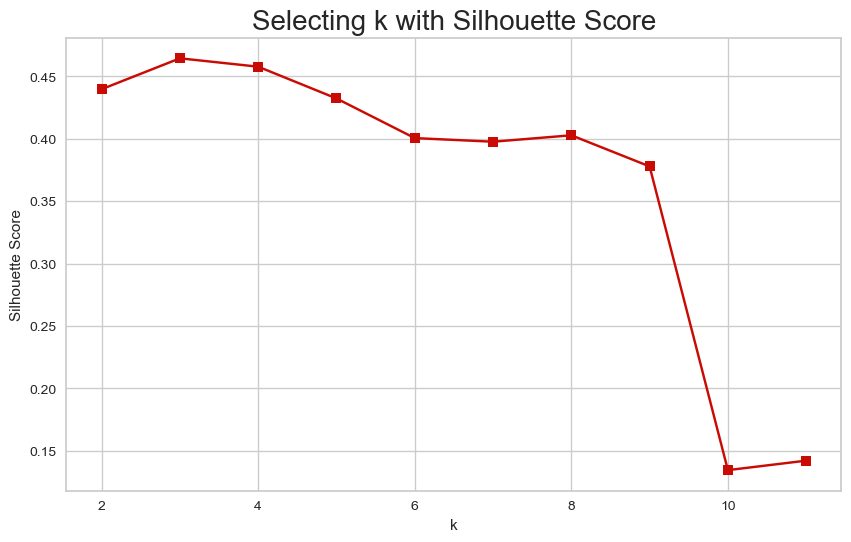

<IPython.core.display.Javascript object>

In [34]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(cluster_list, sil_score, "-rs")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Selecting k with Silhouette Score", fontsize=20)

From silhouette score, it appears that 3 or 4 may be good values for $k$

### Finding optimal no. of clusters, $k$, with silhouette coefficients

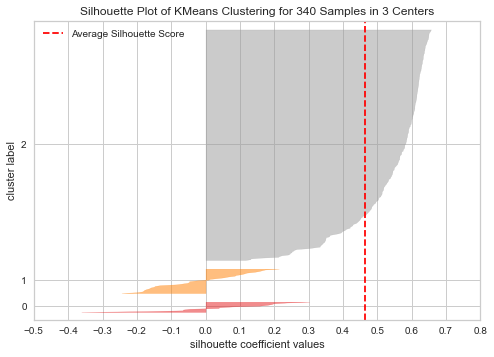

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [35]:
# k = 3
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

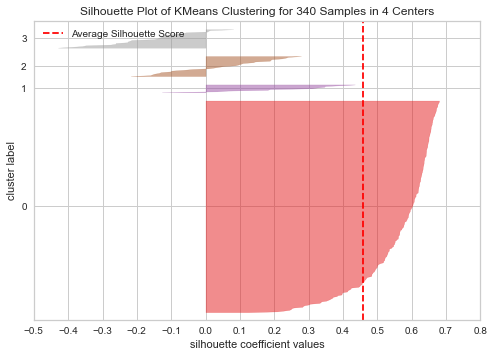

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [36]:
# k = 4
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

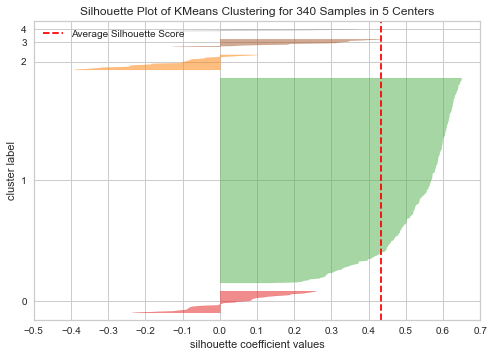

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [37]:
# k = 5
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

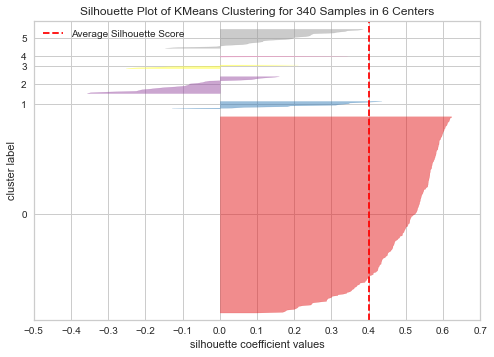

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [38]:
# k = 6
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

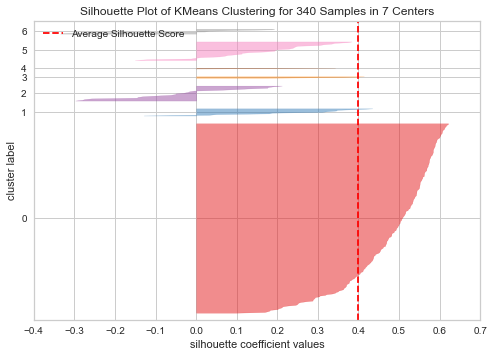

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [39]:
# k = 7
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

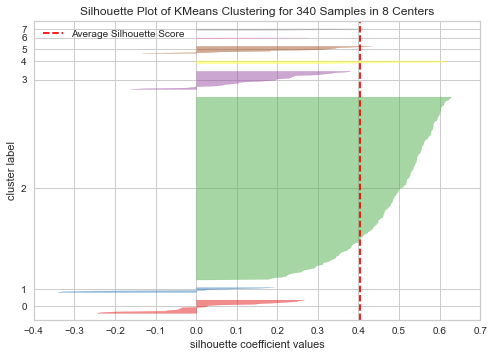

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [40]:
# k = 8
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

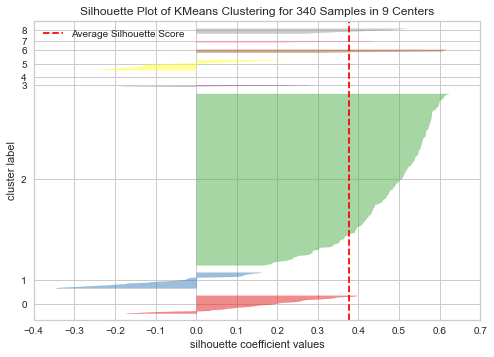

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [41]:
# k = 9
visualizer = SilhouetteVisualizer(KMeans(9, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

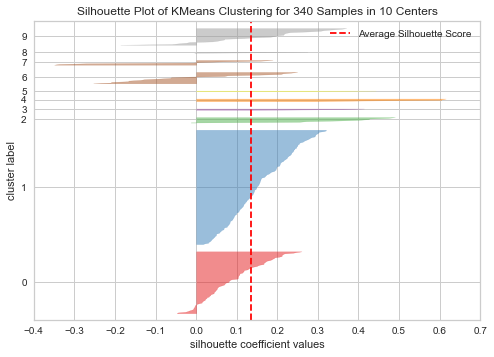

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [42]:
# k = 10
visualizer = SilhouetteVisualizer(KMeans(10, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

### Let us take $k=4$

Unfortunately all visualization for $k$-values from 3 to 10 cross the threshold to negative on the silhouette coefficient values, but $k=4$ has a knick in the elbow curve and has a high silhouette score.

In [43]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

<IPython.core.display.Javascript object>

In [44]:
df["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653,3
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205,3
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941,3
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333,3
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196,0


<IPython.core.display.Javascript object>

In [45]:
cluster_profile = subset_scaled_df.groupby("K_means_segments").mean()
cluster_profile

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
K_means_segments,,,,,,,,,,,
0,1.565799,0.777609,0.345241,-0.145189,2.299485,0.771489,0.019883,0.496883,0.001525,0.956300,1.155908
1,-0.436756,-1.622242,2.342968,0.699929,-0.221363,-0.110608,-1.367911,-1.862300,-0.114408,1.309894,0.219435
2,-0.309926,0.139248,-0.669418,-0.088233,0.065186,-0.580298,3.390319,0.209466,4.406556,-0.402159,-0.203198
3,-0.086438,0.082414,-0.232951,-0.051617,-0.188546,-0.035803,-0.003094,0.128361,-0.163976,-0.198018,-0.117644


<IPython.core.display.Javascript object>

In [46]:
# let's see the names of the countries in each cluster
for cl in df["K_means_segments"].unique():
    print(
        "The",
        df[df["K_means_segments"] == cl]["Company"].nunique(),
        "companies in cluster",
        cl,
        "are:",
    )
    print(df[df["K_means_segments"] == cl]["Company"].unique())
    print("-" * 100, "\n")

The 277 companies in cluster 3 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='K_means_segments'>

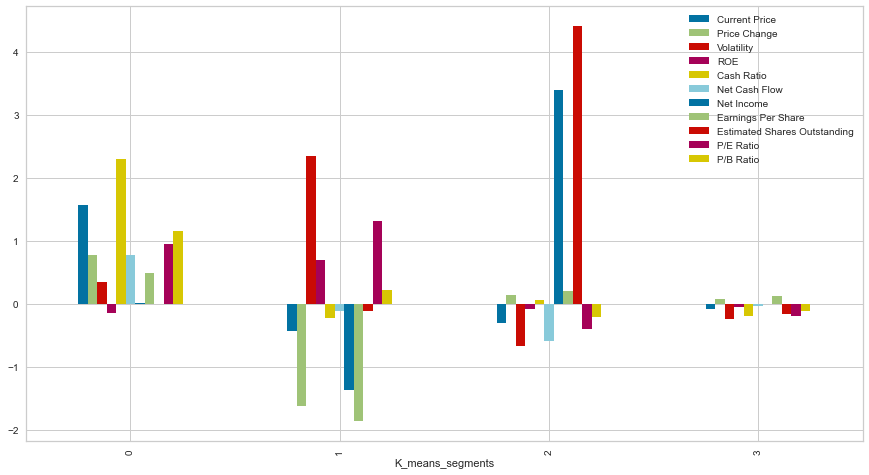

<IPython.core.display.Javascript object>

In [47]:
cluster_profile.plot.bar(figsize=(15, 8))

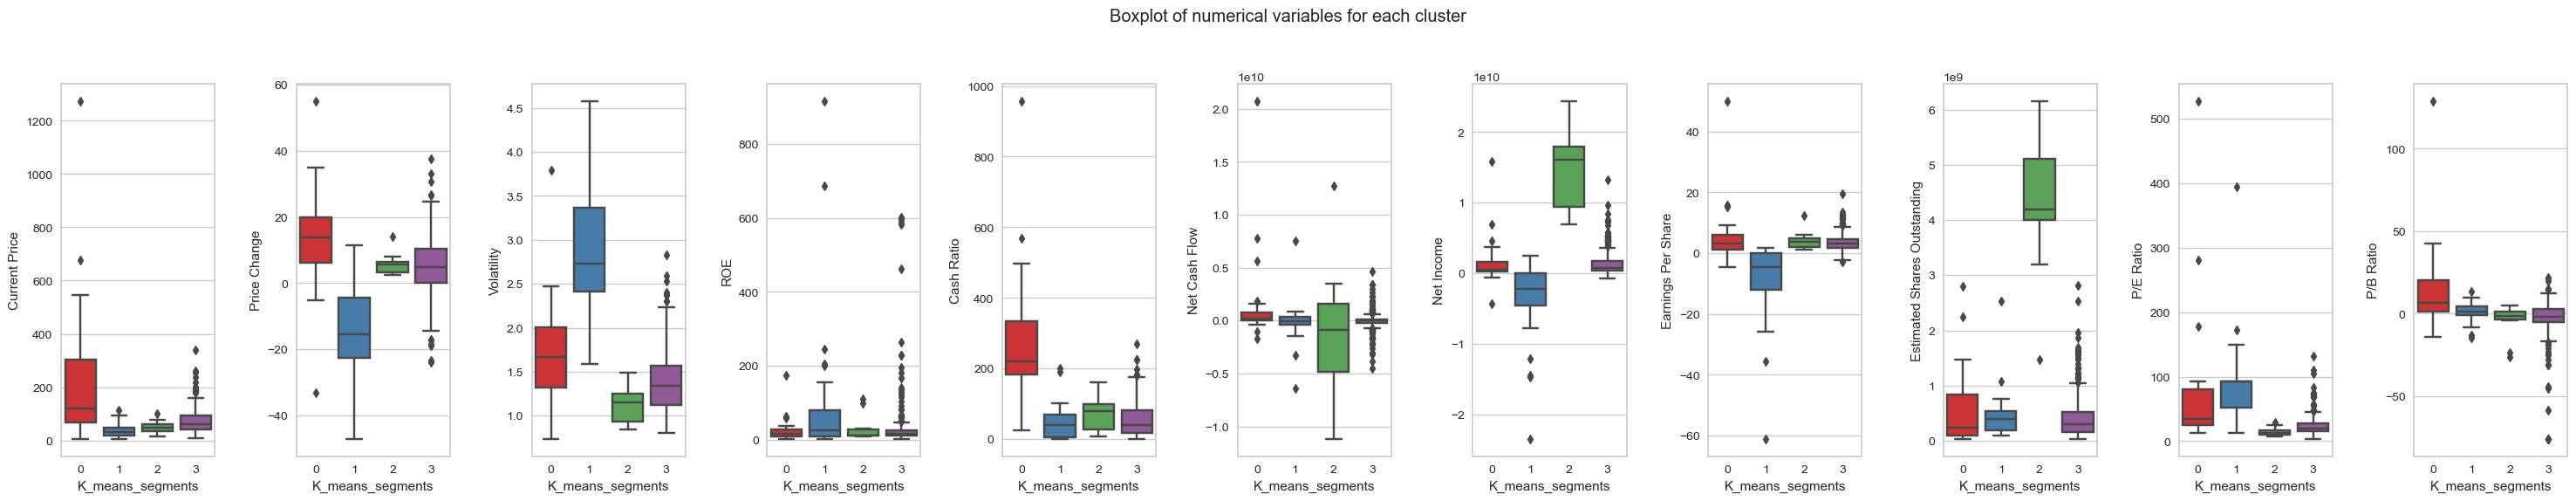

<IPython.core.display.Javascript object>

In [48]:
fig, axes = plt.subplots(1, 11, figsize=(30, 6), dpi=100)
fig.suptitle("Boxplot of numerical variables for each cluster")

for ii in range(11):
    sns.boxplot(
        ax=axes[ii], y=df[num_cols[ii]], x=df["K_means_segments"], palette="Set1"
    )

fig.tight_layout(pad=2.0)

### Insights

* <font color='firebrick'>Cluster 0 (red)</font>
    * <font color='firebrick'>Current price highest, with large variance</font>
    * <font color='firebrick'>Price change highest</font>
    * Volatility moderate
    * ROE fairly low
    * <font color='firebrick'>Cash ratio high</font>
    * Net cash flow comparatively moderate, mostly positive
    * Net income fairly low, mostly positive
    * Earnings per share fairly low, mostly positive
    * Estimated shares outstanding low
    * P/E ratio moderately high
    * <font color='firebrick'>P/B ratio relatively high, mostly positive</font>
* <font color='steelblue'>Cluster 1 (blue)</font>
    * <font color='steelblue'>Current price lowest</font>
    * <font color='steelblue'>Price change mostly negative</font>
    * <font color='steelblue'>Volatility very high</font>
    * <font color='steelblue'>ROE comparatively moderate to high, aside from outliers</font>
    * Cash ratio low, close to zero
    * Net cash flow low, close to zero with little variance
    * <font color='steelblue'>Net income low, mostly negative</font>
    * <font color='steelblue'>Earnings per share low, mostly negative</font>
    * Estimated shares outstanding somewhat low
    * <font color='steelblue'>P/E ratio relatively high compared to other clusters, aside from outliers</font>
    * P/B ratio low, just above zero
* <font color='green'>Cluster 2 (green)</font>
    * Current price fairly low, close to zero
    * Price change close to zero, positive
    * <font color='green'>Volatility low</font>
    * ROE low
    * Cash ratio somewhat low
    * <font color='green'>Net cash flow low, mostly negative</font>
    * <font color='green'>Net income high</font>
    * Earnings per share moderately low
    * <font color='green'>Estimated shares outstanding high</font>
    * <font color='green'>P/E ratio low</font>
    * P/B ratio close to zero, mostly negative 
* <font color='purple'>Cluster 3 (purple)</font>
    * <font color='purple'>Most variables have values close to zero</font>
    * Current price low to moderately low
    * Price change has large variance but ranges from negative to positive values
    * Volatility fairly low
    * ROE fairly low
    * Cash ratio low
    * Net cash flow close to zero
    * Net income just positive
    * Earnings per share not much above zero
    * Estimated shares outstanding fairly low
    * P/E Ratio fairly low
    * P/B ratio low, mostly negative

## Hierarchical Clustering

In [49]:
df.drop("K_means_segments", axis=1, inplace=True)
subset_scaled_df.drop("K_means_segments", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [50]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods: Distance between clusters
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]  # [dm,lm]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        # Z: The hierarchical clustering encoded as a linkage matrix (or as an array).
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correl

<IPython.core.display.Javascript object>

In [51]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

### Explore different linkage methods with Euclidean distance only

In [52]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


<IPython.core.display.Javascript object>

In [53]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


<IPython.core.display.Javascript object>

**We see that the cophenetic correlation is highest when obtained with Euclidean distance and average linkage.**

### Dendograms for different linkage methods

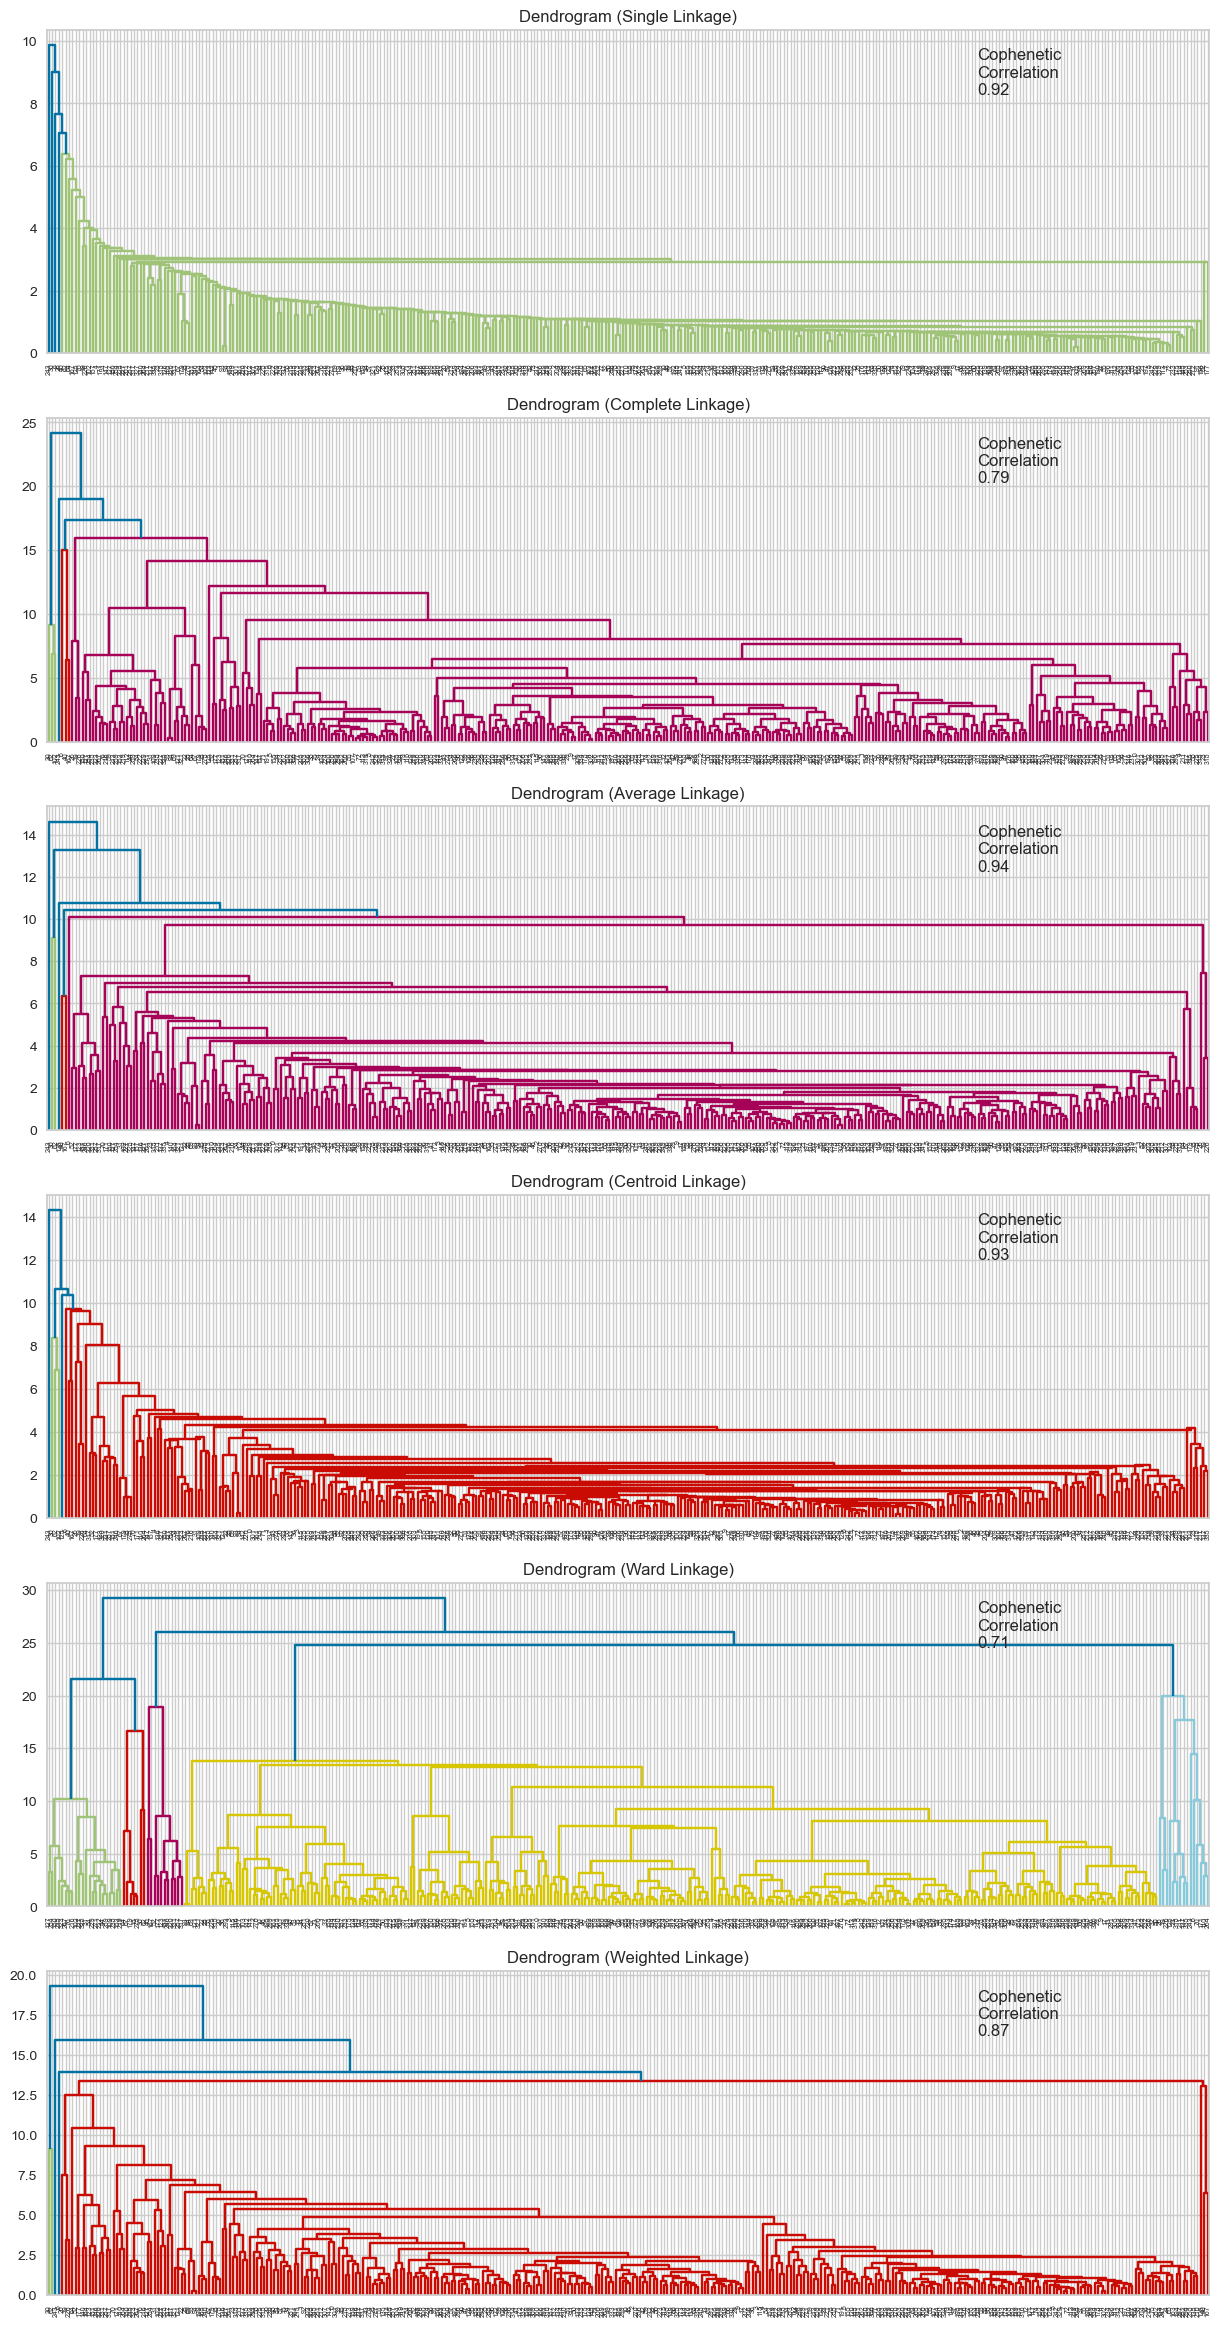

<IPython.core.display.Javascript object>

In [54]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30), dpi=100)

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation

for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**
* Cophenetic correlation is highest for average linkage, followed closely by centroid linkage
* We will move ahead with average linkage
* According to the dendogram, 6 appears to be an appropriate number of clusters for average linkage

In [55]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=6)

<IPython.core.display.Javascript object>

In [56]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_
df.head()

,Ticker Symbol,Company,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,HC_Clusters
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219,0
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068,0
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171,0
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651,0
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810,0


<IPython.core.display.Javascript object>

### Cluster Profiling

In [57]:
cluster_profile_hc = df.groupby("HC_Clusters").mean()
cluster_profile_hc

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
HC_Clusters,,,,,,,,,,,
0,77.287589,4.099730,1.518066,35.336336,66.900901,-3.319732e+07,1.538075e+09,2.88527,5.605050e+08,32.441706,-2.174921
1,25.640000,11.237908,1.322355,12.500000,130.500000,1.675550e+10,1.365400e+10,3.29500,2.791829e+09,13.649696,1.508484
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1.292500e+09,-1.910650e+10,-41.81500,5.195740e+08,60.748608,1.565141
3,104.660004,16.224320,1.320606,8.000000,958.000000,5.920000e+08,3.669000e+09,1.31000,2.800763e+09,79.893133,5.884467
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1.671386e+09,2.551360e+09,50.09000,5.093552e+07,25.453183,-1.052429
5,276.570007,6.189286,1.116976,30.000000,25.000000,9.088500e+07,5.965410e+08,8.91000,6.695185e+07,31.040405,129.064585


<IPython.core.display.Javascript object>

In [58]:
cluster_profile_hc["count_in_each_segments"] = df.groupby("HC_Clusters").size()

cluster_profile_hc

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,77.287589,4.099730,1.518066,35.336336,66.900901,-3.319732e+07,1.538075e+09,2.88527,5.605050e+08,32.441706,-2.174921,333
1,25.640000,11.237908,1.322355,12.500000,130.500000,1.675550e+10,1.365400e+10,3.29500,2.791829e+09,13.649696,1.508484,2
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1.292500e+09,-1.910650e+10,-41.81500,5.195740e+08,60.748608,1.565141,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,5.920000e+08,3.669000e+09,1.31000,2.800763e+09,79.893133,5.884467,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1.671386e+09,2.551360e+09,50.09000,5.093552e+07,25.453183,-1.052429,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,9.088500e+07,5.965410e+08,8.91000,6.695185e+07,31.040405,129.064585,1


<IPython.core.display.Javascript object>

In [59]:
# let's see the names of the companies in each cluster
for cl in df["HC_Clusters"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df[df["HC_Clusters"] == cl]["Company"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Alexion Pharmaceuticals' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.'
 'Aon plc' 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball 

<IPython.core.display.Javascript object>

**Observations**
* There are 3 clusters with just one company, 1 cluster with two companies, 1 cluster with three companies, and one cluster with all of the remaining companies.
* We can try Ward linkage as there are more distinct and separated clusters, as seen from the dendogram.
* Again, 6 appears to be an appropriate number of clusters, given the dendogram for the Ward linkage.

In [60]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=6)

<IPython.core.display.Javascript object>

In [61]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

### Cluster Profiling Part 2

In [62]:
cluster_profile_hc2 = df.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [63]:
cluster_profile_hc2["count_in_each_segments"] = df.groupby("HC_Clusters").size()

cluster_profile_hc2

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,563.992491,17.235667,1.839399,10.250000,125.500000,1.058340e+08,8.535002e+08,13.085000,2.878063e+08,307.105187,-4.254889,4
1,84.355716,3.854981,1.827670,633.571429,33.571429,-5.684000e+08,-4.968157e+09,-10.841429,3.981690e+08,42.284541,-11.589502,7
2,152.566666,14.908086,1.769506,24.434783,281.913043,1.747221e+09,1.866622e+09,3.802174,7.597570e+08,38.674023,16.027369,23
3,72.421687,4.563230,1.403434,25.218182,55.014545,7.280187e+07,1.572467e+09,3.728564,4.450039e+08,24.188244,-2.966949,275
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-4.728341e+08,-3.161045e+09,-8.005000,5.143678e+08,85.555682,0.836839,22
5,46.672222,5.166566,1.079367,25.000000,58.333333,-3.040667e+09,1.484844e+10,3.435556,4.564960e+09,15.596051,-6.354193,9


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='HC_Clusters'>

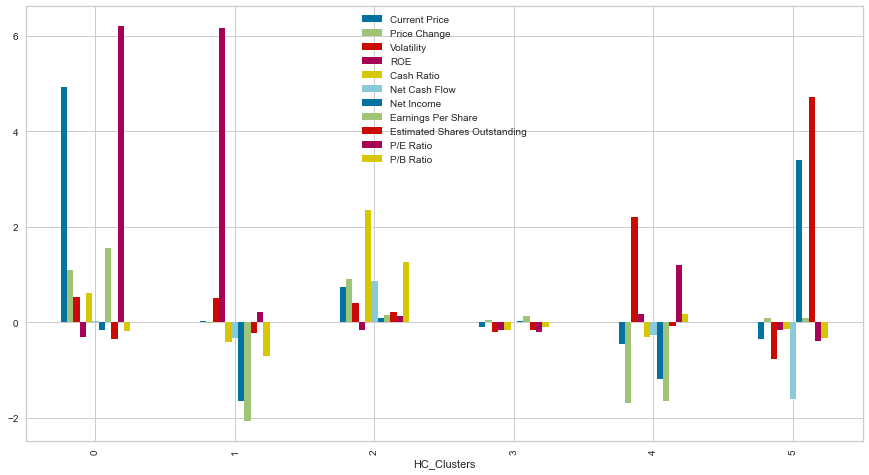

<IPython.core.display.Javascript object>

In [64]:
cluster_profile_hc3 = subset_scaled_df.groupby("HC_Clusters").mean()
cluster_profile_hc3.plot.bar(figsize=(15, 8))

In [65]:
# let's see the names of the countries in each cluster
for cl in df["HC_Clusters"].unique():
    print(
        "The",
        df[df["HC_Clusters"] == cl]["Company"].nunique(),
        "companies in cluster",
        cl,
        "are:",
    )
    print(df[df["HC_Clusters"] == cl]["Company"].unique())
    print("-" * 100, "\n")

The 275 companies in cluster 3 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'American Water Works Company Inc'
 'American Express Co' 'Boeing Company' 'Baxter International Inc.'
 'BB&T Corporation' 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 'Carnival Corp.

<IPython.core.display.Javascript object>

Now the clusters appear to have more variability.

In [66]:
# lets display cluster profile
cluster_profile_hc2.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,563.992491,17.235667,1.839399,10.250000,125.500000,105834000.000000,853500250.000000,13.085000,287806305.492500,307.105187,-4.254889,4
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,7
2,152.566666,14.908086,1.769506,24.434783,281.913043,1747221304.347826,1866621956.521739,3.802174,759756952.867391,38.674023,16.027369,23
3,72.421687,4.563230,1.403434,25.218182,55.014545,72801872.727273,1572467469.090909,3.728564,445003946.148764,24.188244,-2.966949,275
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,22
5,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,9


<IPython.core.display.Javascript object>

**Observations**
* Cluster 0 has the maximum `Current Price`, `Price Change`, `Earnings Per Share`, and `P/E Ratio`
* Cluster 1 has the maximum `ROE`
* Cluster 2 has the maximum `Cash Ratio`, `Net Cash Flow`, and `P/B Ratio`
* Cluster 3 has the maximum count
* Cluster 4 has the maximum `Volatility`
* Cluster 5 has the maximum `Net Income` and `Estimated Shares Outstanding`

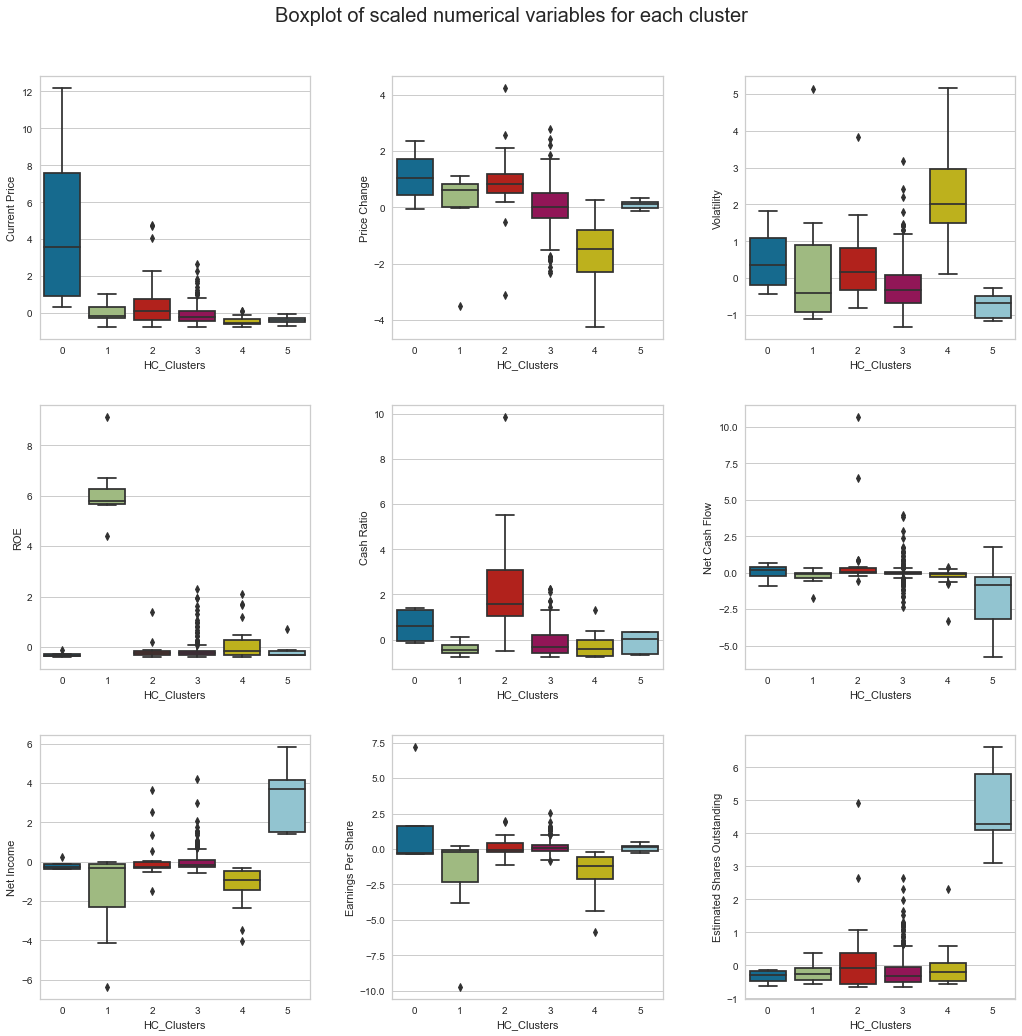

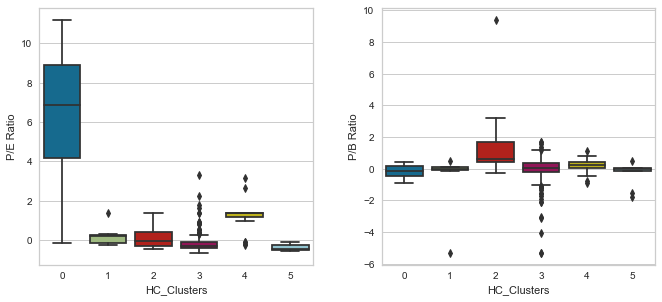

<IPython.core.display.Javascript object>

In [67]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(3):
    sns.boxplot(
        ax=axes[ii][0],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][1],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1
    sns.boxplot(
        ax=axes[ii][2],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1
fig.tight_layout(pad=3.0)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(
    ax=axes[0],
    y=subset_scaled_df[num_cols[counter]],
    x=subset_scaled_df["HC_Clusters"],
)
counter = counter + 1
sns.boxplot(
    ax=axes[1],
    y=subset_scaled_df[num_cols[counter]],
    x=subset_scaled_df["HC_Clusters"],
)
fig.tight_layout(pad=3.0)

### Insights

* <font color='steelblue'>Cluster 0</font>
    * High current price
    * Moderate cash ratio
    * Moderately high earnings per share
    * High P/E ratio
* <font color='yellowgreen'>Cluster 1</font>
    * High ROE
* <font color='firebrick'>Cluster 2</font>
    * Relatively high cash ratio 
    * High P/B ratio
* <font color='darkmagenta'>Cluster 3</font>
    * All variables fairly close to 0
* <font color='gold'>Cluster 4</font>
    * Low price change
    * High volatility
    * Low (negative) net income
    * Low (negative) earnings per share
    * Somewhat moderate P/E ratio
* <font color='turquoise'>Cluster 5</font>
    * Low volatility
    * Somewhat low net cash flow
    * High net income
    * High estimated shares outstanding

## K-means vs Hierarchical Clustering

**K-means**
* The 25 companies in cluster 0 are: 'Analog Devices, Inc.' 'Alliance Data Systems' 'Alexion Pharmaceuticals' 'Amgen Inc' 'Amazon.com Inc' 'Bank of America Corp' 'BIOGEN IDEC Inc.' 'Celgene Corp.' 'Chipotle Mexican Grill' 'Equinix' 'Edwards Lifesciences' 'Facebook' 'First Solar Inc' 'Frontier Communications' 'Halliburton Co.' 'Intuitive Surgical Inc.' "McDonald's Corp." 'Monster Beverage' 'Priceline.com Inc' 'Regeneron' 'TripAdvisor' 'Vertex Pharmaceuticals Inc' 'Waters Corporation' 'Wynn Resorts Ltd' 'Yahoo Inc.'
    * High current price, price change, cash ratio, P/B ratio
* The 27 companies in cluster 1 are: 'Apache Corporation' 'Anadarko Petroleum Corp' 'Baker Hughes Inc' 'Chesapeake Energy' 'Cabot Oil & Gas' 'Concho Resources' 'Devon Energy Corp.' 'EOG Resources' 'EQT Corporation' 'Freeport-McMoran Cp & Gld' 'Hess Corporation' 'Hewlett Packard Enterprise' 'Kinder Morgan' 'Marathon Oil Corp.' 'Murphy Oil' 'Noble Energy Inc' 'Netflix Inc.' 'Newfield Exploration Co' 'National Oilwell Varco Inc.' 'ONEOK' 'Occidental Petroleum' 'Quanta Services Inc.' 'Range Resources Corp.' 'Southwestern Energy' 'Teradata Corp.' 'Williams Cos.' 'Cimarex Energy'
    * Low current price, price change, net income, earnings per share
    * Moderately high ROE, P/E ratio
    * High volatility
* The 11 companies in cluster 2 are: 'Citigroup Inc.' 'Ford Motor' 'Gilead Sciences' 'Intel Corp.' 'JPMorgan Chase & Co.' 'Coca Cola Company' 'Pfizer Inc.' 'AT&T Inc' 'Verizon Communications' 'Wells Fargo' 'Exxon Mobil Corp.'
    * Low volatility, net cash flow, P/E ratio
    * High net income, estimated shares outstanding
* The 277 companies in cluster 3 have:
    * Most variables close to zero in value

**Hierarchical Clustering**
* The 4 companies in cluster 0 are: 'Alexion Pharmaceuticals' 'Amazon.com Inc' 'Netflix Inc.' 'Priceline.com Inc'
    * Moderate to high cash ratio, earnings per share
    * High current price, P/E ratio
* The 7 companies in cluster 1 are: 'Allegion' 'Apache Corporation' 'Chesapeake Energy' 'Charter Communications' 'Colgate-Palmolive' 'Kimberly-Clark' 'S&P Global, Inc.'
    * High ROE
* The 23 companies in cluster 2 are: 'Adobe Systems Inc' 'Alliance Data Systems' 'Applied Materials Inc' 'Amgen Inc' 'Broadcom' 'Bank of America Corp' 'Celgene Corp.' 'Chipotle Mexican Grill' 'Equinix' 'Edwards Lifesciences' 'Facebook' 'First Solar Inc' 'Frontier Communications' 'Intel Corp.' 'Intuitive Surgical Inc.' 'Monster Beverage' 'Newmont Mining Corp. (Hldg. Co.)' 'Regeneron' 'TripAdvisor' 'Vertex Pharmaceuticals Inc' 'Waters Corporation' 'Wynn Resorts Ltd' 'Yahoo Inc.'
    * High cash ratio, P/B ratio
* The 275 companies in cluster 3 have:
    * Most variables close to zero in value
* The 22 companies in cluster 4 are: 'Anadarko Petroleum Corp' 'Baker Hughes Inc' 'Cabot Oil & Gas' 'Concho Resources' 'Devon Energy Corp.' 'EOG Resources' 'Freeport-McMoran Cp & Gld' 'Hess Corporation' 'Kinder Morgan' 'Marathon Oil Corp.' 'Murphy Oil' 'Noble Energy Inc' 'Newfield Exploration Co' 'National Oilwell Varco Inc.' 'ONEOK' 'Occidental Petroleum' 'Range Resources Corp.' 'Spectra Energy Corp.' 'Southwestern Energy' 'Teradata Corp.' 'Williams Cos.' 'Cimarex Energy'
    * Low price change, net income (negative), earnings per share (negative)
    * Moderate P/E ratio
    * High volatility
* The 9 companies in cluster 5 are: 'Citigroup Inc.' 'Ford Motor' 'JPMorgan Chase & Co.' 'Coca Cola Company' 'Pfizer Inc.' 'AT&T Inc' 'Verizon Communications' 'Wells Fargo' 'Exxon Mobil Corp.'
    * Low volatility
    * Somewhat low net cash flow
    * High net income, estimated shares outstanding

## Actionable Insights and Recommendations

* Gather information from individual investors as stock recommendations need to be tailored to each individual
    * Risk tolerance
    * Specific goals
    * Short- or long-term investing
    * Capital available for investing
    * Etc.
* Pair clustering model with EDA observations to choose companies that will work best for individual investor
    * E.g., if investor is looking for low volatility stock, choose the cluster with low volatility and compare estimated shares outstanding for those companies with their sector averages to give a better indication of long-term patterns
* Recommend a diversified portfolio based on their profile, choosing stocks that fit their profile across different sectors
* More data
    * Information regarding dividends is valuable since some people only invest in dividend stock
    * Debt-to-equity, debt-to-assets, EBITDA, etc. would additionally be valuable information for a more accurate clustering model as well as double check data accuracy
    * Longer time span since some factors like price change/volatility are different throughout different parts of the year
* Check existing model against long-period dataset to see how well it did